# STROKE PREDICTION

## Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

## Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not

In [1]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score,precision_score,accuracy_score,f1_score
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import itertools
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [4]:
df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [5]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [7]:
null_elem = df.isnull().sum()
print(null_elem)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [8]:
na_sum = df.isna().sum()
print(na_sum)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [9]:
df.shape

(5110, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [11]:
df["stroke"].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [12]:
df["smoking_status"].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [13]:
grouped_means = df.groupby('age')['bmi'].transform('mean')
df['bmi'] = df['bmi'].fillna(grouped_means)

In [14]:
categorical_columns = ['work_type','gender','ever_married']
df['smoking_status'].replace('Unknown', pd.NA, inplace=True)

def fillna_mode(x):
    if not x.dropna().empty:
        x_filled = x.fillna(x.mode().iat[0])
        return x_filled
    else:
        print(x)
        return x

df['smoking_status'] = df.groupby(categorical_columns)['smoking_status'].transform(fillna_mode)

In [15]:
null_elem = df.isnull().sum()
print(null_elem)

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


## EDA

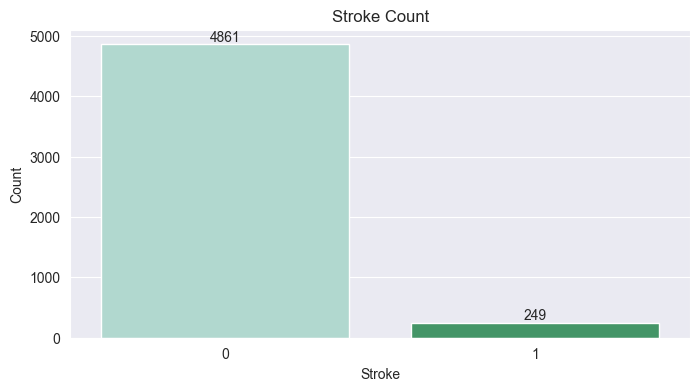

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Подсчет количества значений
stroke_counts = df['stroke'].value_counts()

# Создание графика
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='stroke', palette='BuGn')

# Добавление аннотаций с количеством наблюдений в каждой категории
for i, count in enumerate(stroke_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

# Настройка макета графика
plt.title('Stroke Count')
plt.xlabel('Stroke')
plt.ylabel('Count')

# Отображение графика
plt.show()


In [17]:
df['hypertension'] = df['hypertension'].astype('object')
df['heart_disease'] = df['heart_disease'].astype('object')

In [18]:
numeric_columns = df.select_dtypes(exclude=['object']).columns
df[numeric_columns].head(2)

id   age  avg_glucose_level    bmi  stroke
0   9046  67.0             228.69  36.60       1
1  51676  61.0             202.21  30.19       1

In [19]:
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns].head(2)

gender hypertension heart_disease ever_married      work_type  \
0    Male            0             1          Yes        Private   
1  Female            0             0          Yes  Self-employed   

  Residence_type   smoking_status  
0          Urban  formerly smoked  
1          Rural     never smoked

In [20]:
df[numeric_columns].corr()

id       age  avg_glucose_level       bmi    stroke
id                 1.000000  0.003538           0.001092  0.001217  0.006388
age                0.003538  1.000000           0.238171  0.334830  0.245257
avg_glucose_level  0.001092  0.238171           1.000000  0.172148  0.131945
bmi                0.001217  0.334830           0.172148  1.000000  0.042311
stroke             0.006388  0.245257           0.131945  0.042311  1.000000

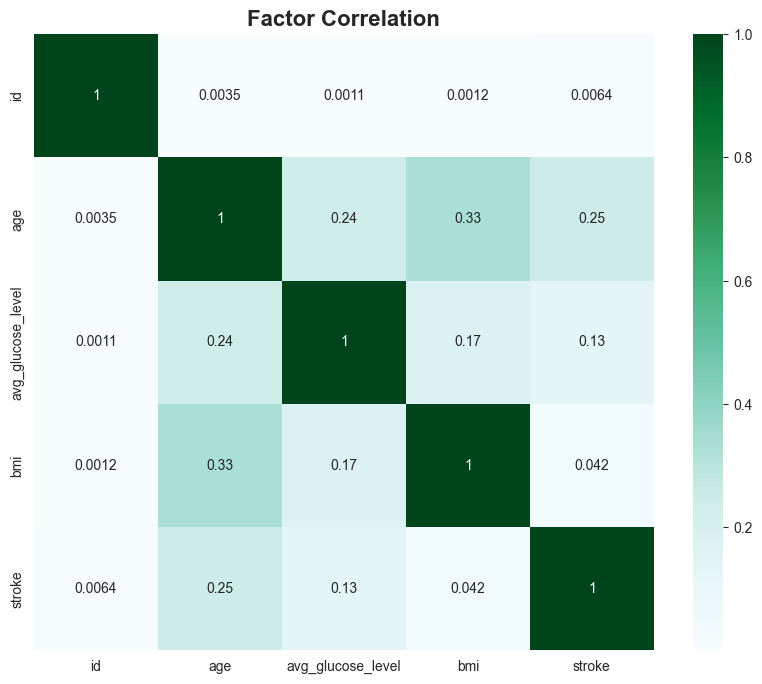

In [21]:
# Correlation between each factor
corr = df[numeric_columns].corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr, cmap = 'BuGn', annot = True)
plt.title("Factor Correlation", fontweight = "bold", fontsize=16)
plt.show()

In [22]:
#Вывод топа корреляции
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df[numeric_columns], 10))

Top Absolute Correlations
age                bmi                  0.334830
                   stroke               0.245257
                   avg_glucose_level    0.238171
avg_glucose_level  bmi                  0.172148
                   stroke               0.131945
bmi                stroke               0.042311
id                 stroke               0.006388
                   age                  0.003538
                   bmi                  0.001217
                   avg_glucose_level    0.001092
dtype: float64


In [23]:
### Посмотрим на квазиконстантые признаки
from sklearn.feature_selection import VarianceThreshold

cutter = VarianceThreshold(threshold=0.1)
cutter.fit(df[numeric_columns])
print(cutter.get_feature_names_out())
print(numeric_columns)

['id' 'age' 'avg_glucose_level' 'bmi']
Index(['id', 'age', 'avg_glucose_level', 'bmi', 'stroke'], dtype='object')


In [24]:
df = df.drop(['id'], axis=1)
numeric_columns = numeric_columns.drop(['id'])

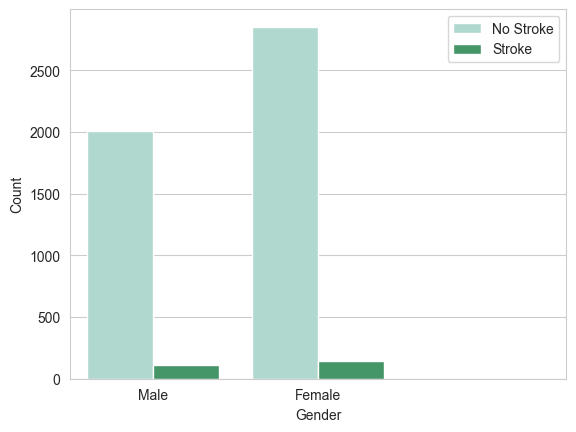

In [25]:
# Assuming 'ever_married' and 'stroke' are columns in your DataFrame X
ax = sns.countplot(x='gender', hue='stroke', data=df, palette='BuGn')

ax.set(xlabel='Gender', ylabel='Count')
labels = ["Male", "Female"] 
ax.set_xticklabels(labels)

legend_labels = ['No Stroke', 'Stroke'] 
ax.legend(labels=legend_labels)

plt.show()

<Figure size 2000x1500 with 0 Axes>

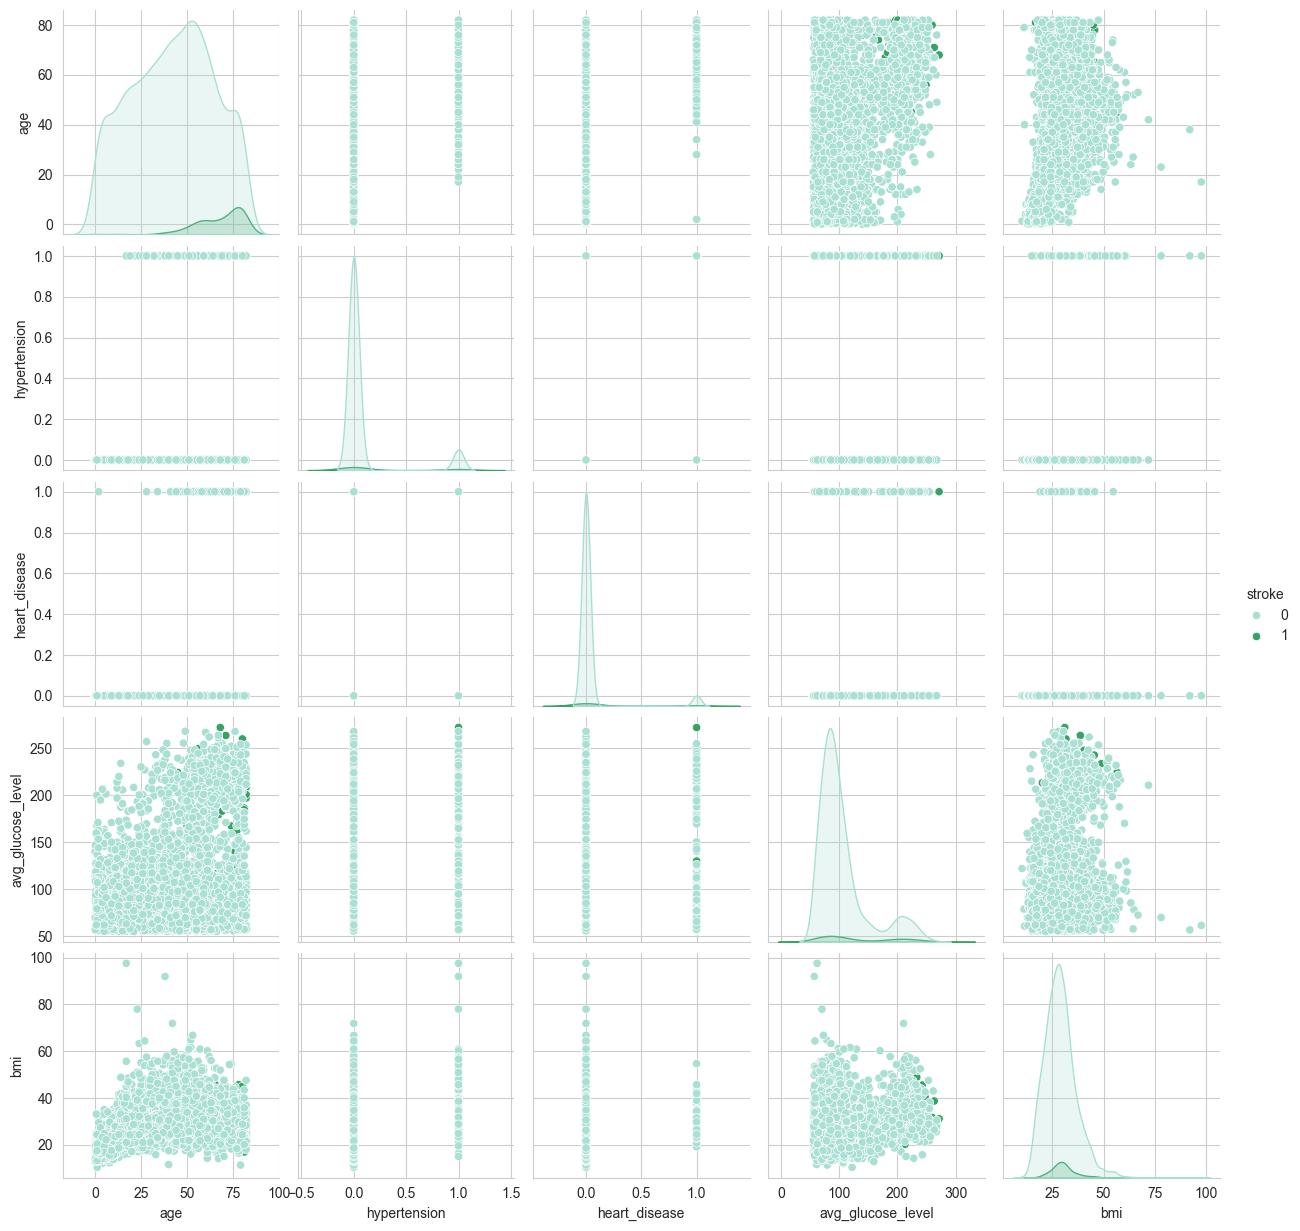

In [26]:
fig=plt.figure(figsize=(20,15),dpi=100)
sns.pairplot(df,hue="stroke",palette='BuGn');

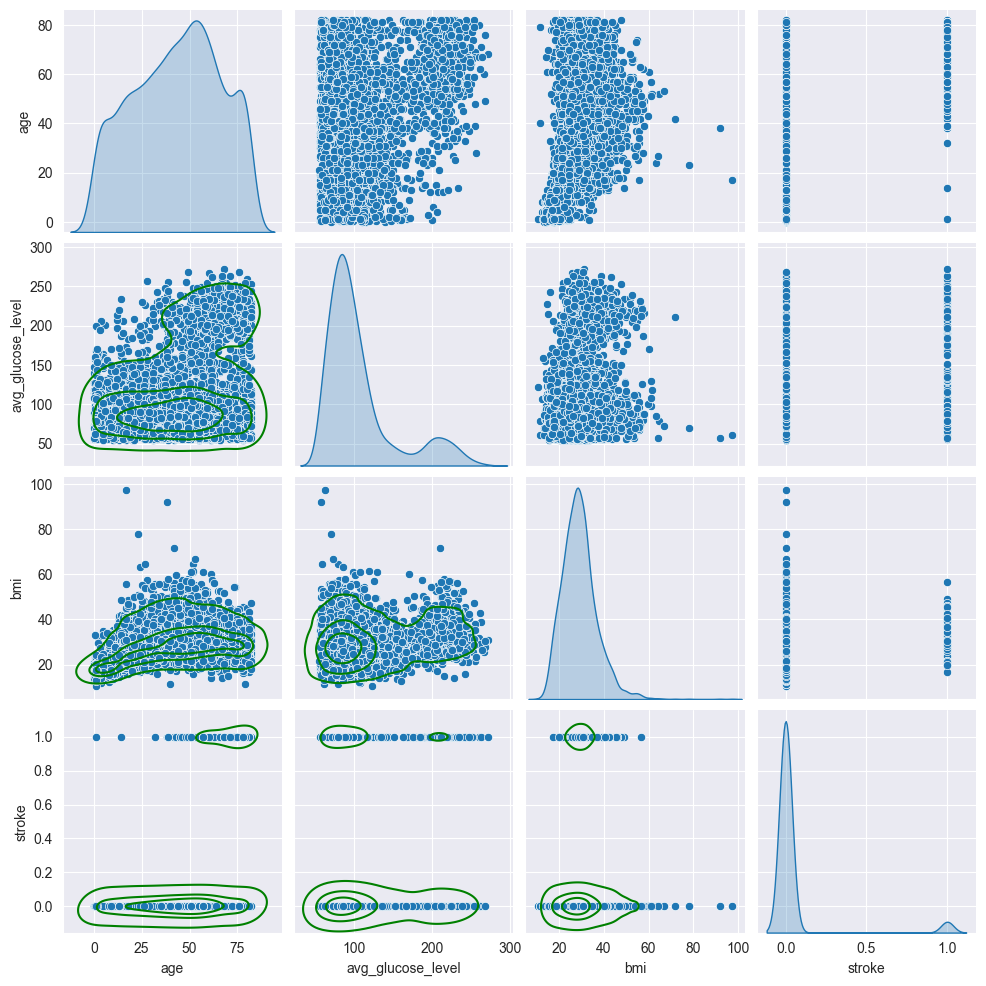

In [36]:
graph=sns.pairplot(df[numeric_columns],diag_kind='kde',palette='BuGn')
graph.map_lower(sns.kdeplot,levels=4, color='Green')
plt.show()

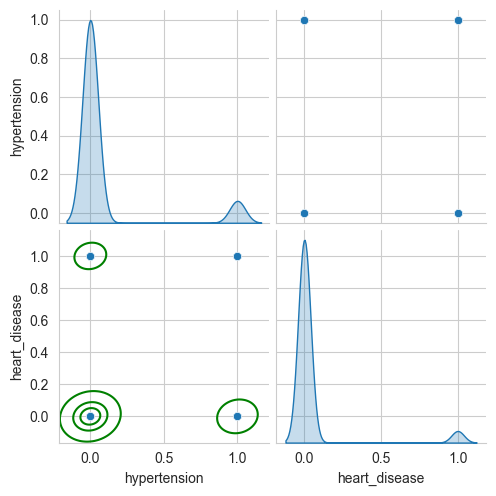

In [28]:
graph=sns.pairplot(df[categorical_columns],diag_kind='kde',palette='BuGn')
graph.map_lower(sns.kdeplot,levels=4, color='Green')
plt.show()

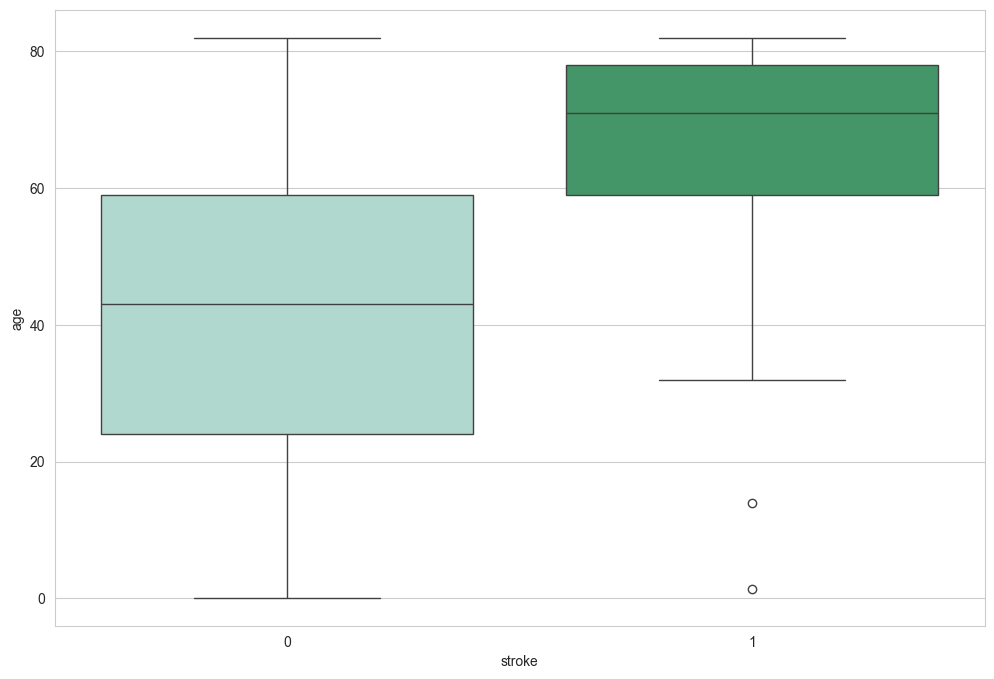

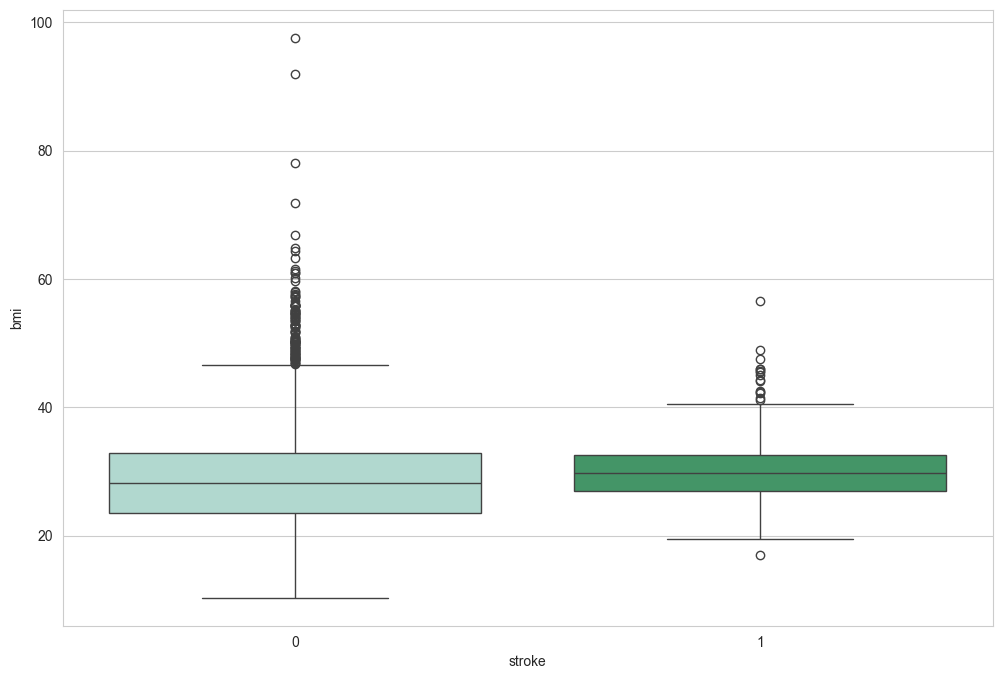

In [29]:
num_col = ['age', 'bmi']

for col in num_col:
    
    fig = plt.figure()
    fig.set_size_inches(12, 8)
    
    sns.boxplot(y=col, x=df['stroke'].astype('category'), data=df,palette='BuGn')
    
    plt.show()

In [30]:
df = df[df['gender'] != 'Other']

In [31]:
df.describe(include=['object'])

gender  hypertension  heart_disease ever_married work_type  \
count     5109          5109           5109         5109      5109   
unique       2             2              2            2         5   
top     Female             0              0          Yes   Private   
freq      2994          4611           4833         3353      2924   

       Residence_type smoking_status  
count            5109           5109  
unique              2              3  
top             Urban   never smoked  
freq             2596           3370

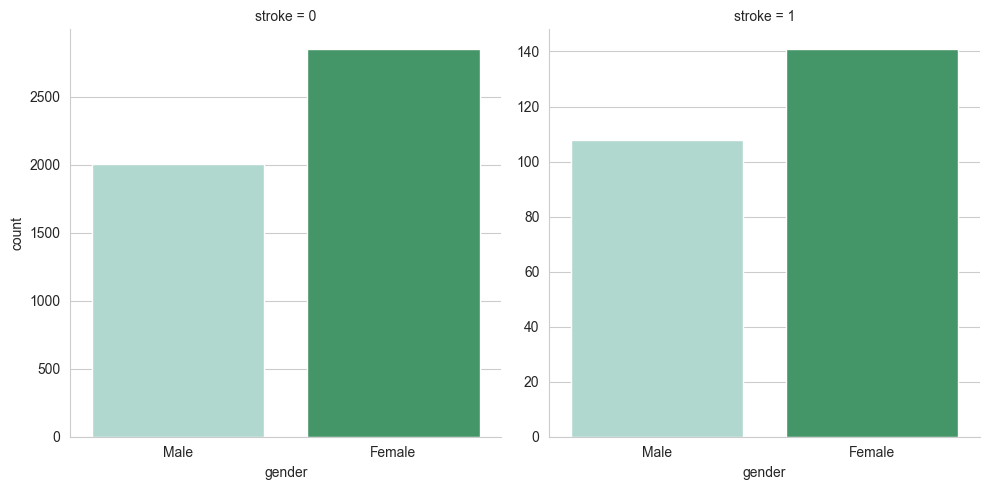

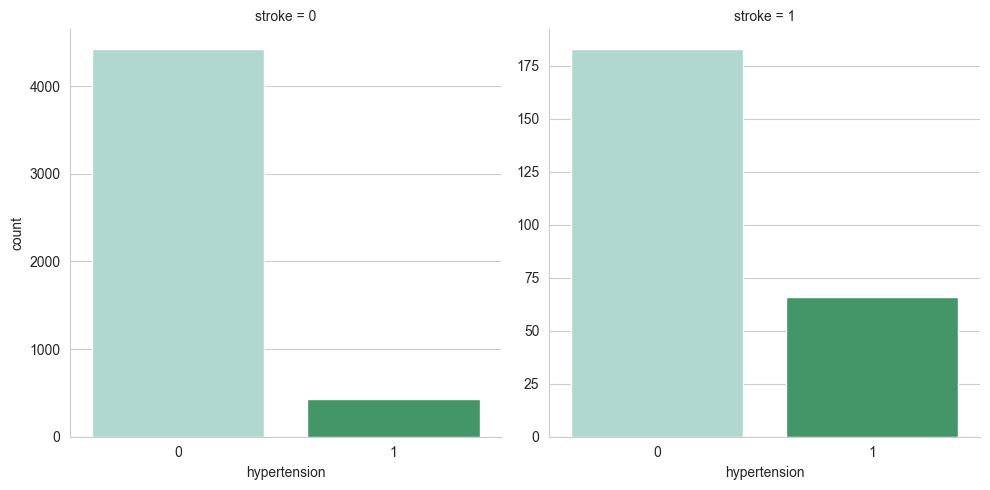

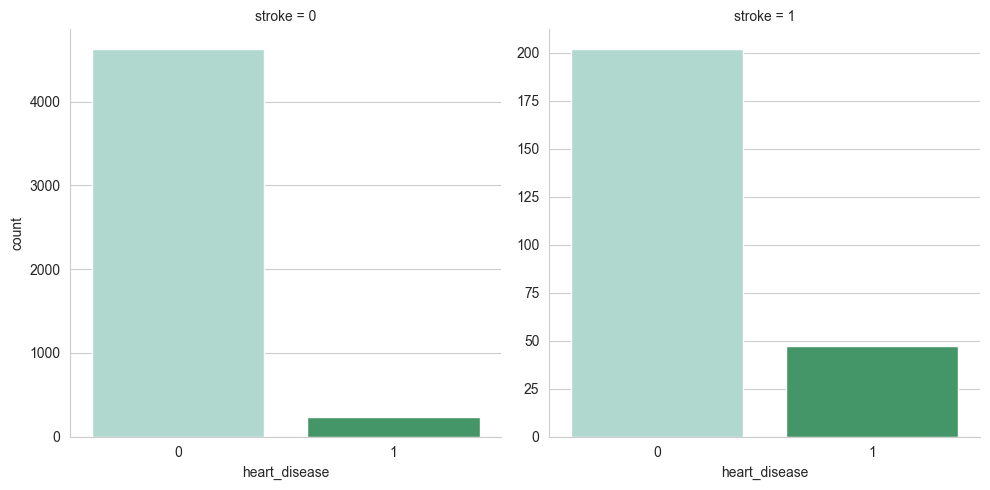

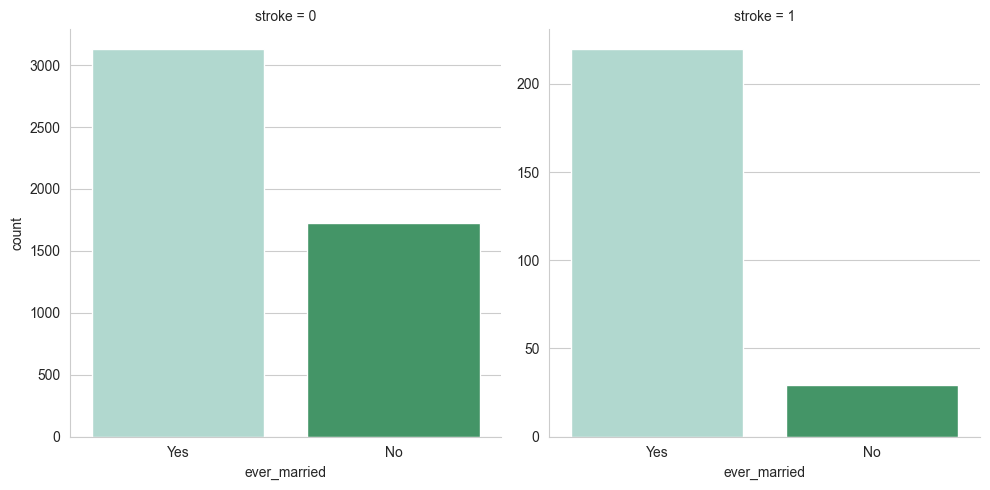

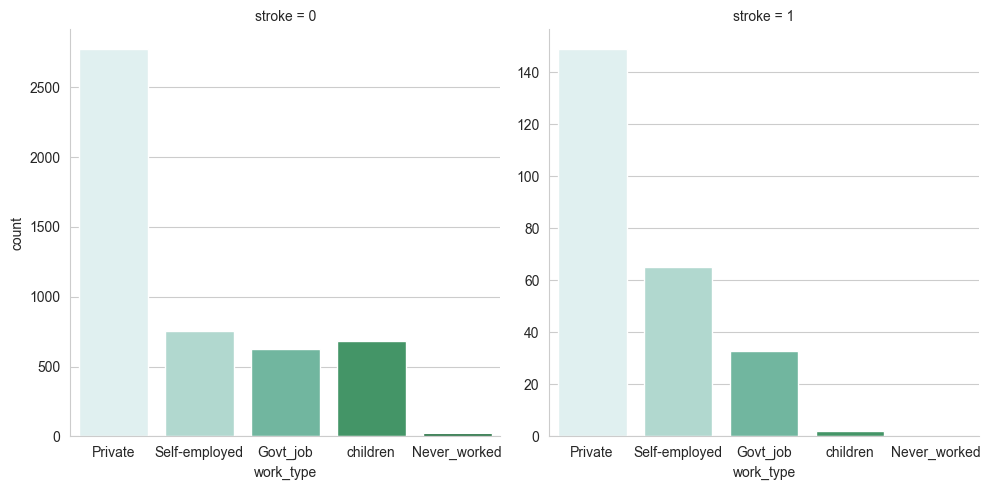

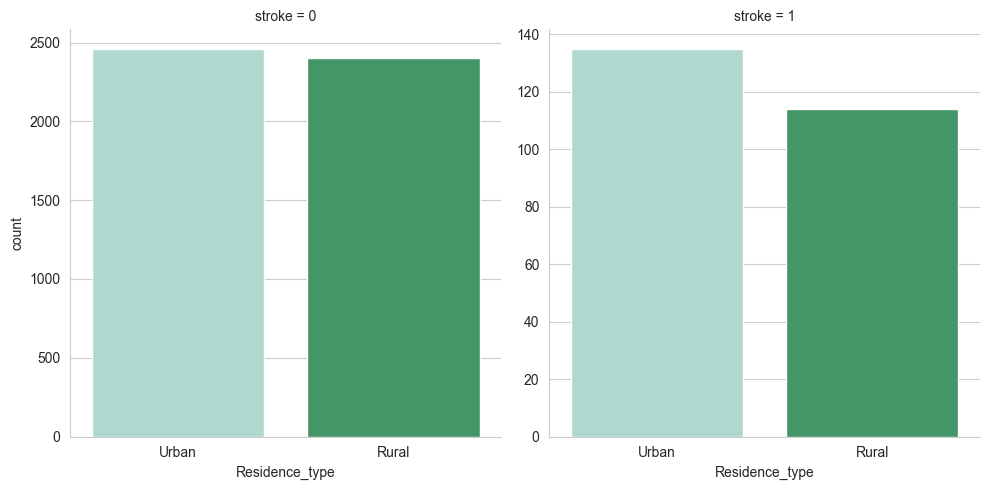

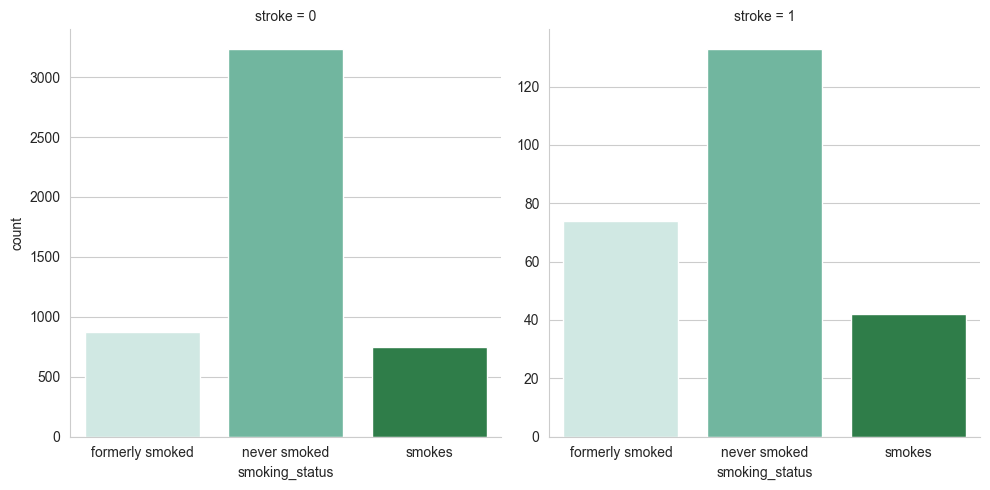

In [32]:
for col in categorical_columns:
    g = sns.catplot(x=col, kind='count', col='stroke', data=df, sharey=False, palette='BuGn')

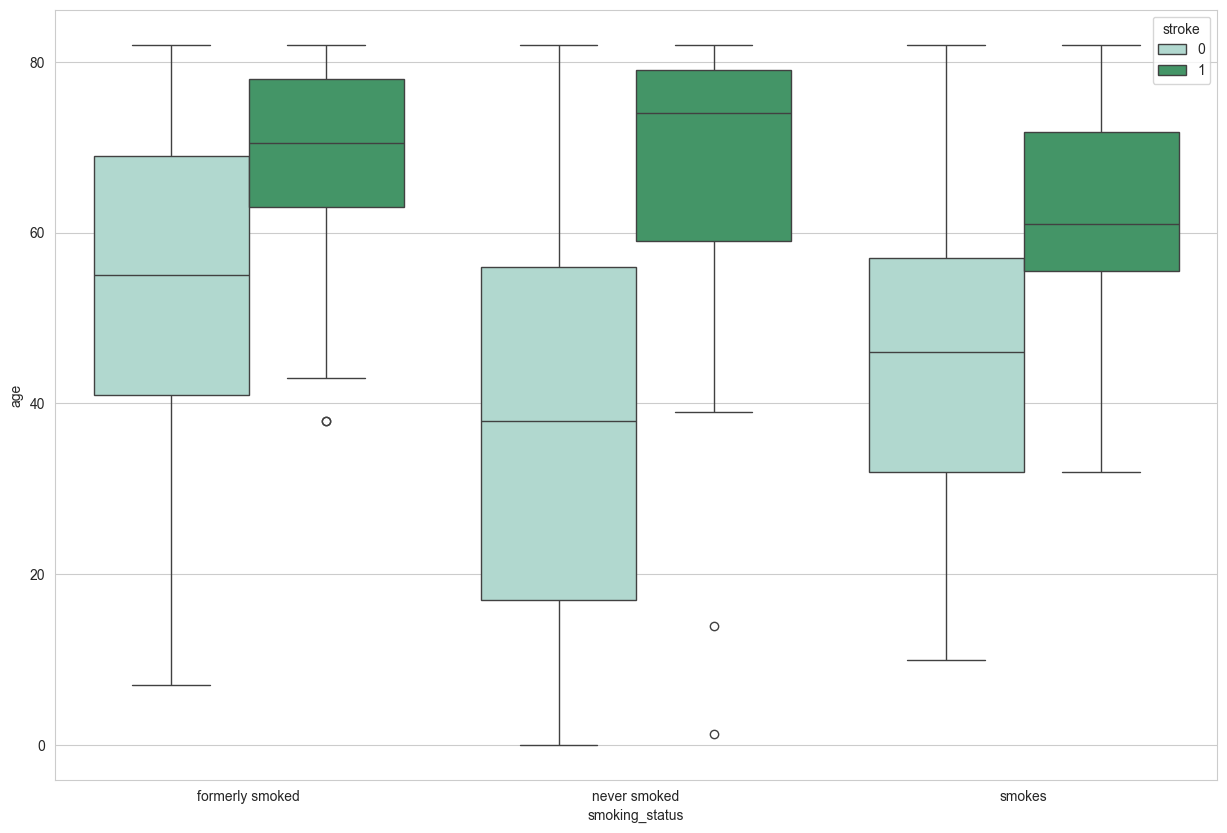

In [33]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "smoking_status", y = "age", data = df, hue = "stroke", palette = 'BuGn');

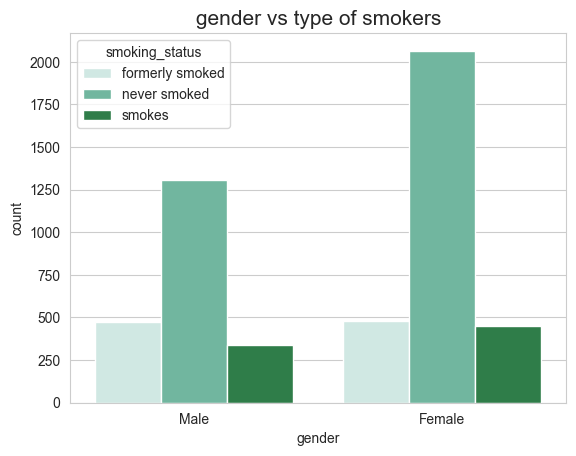

In [34]:
sns.countplot(x=df["gender"], hue=df["smoking_status"], palette='BuGn')
plt.title("gender vs type of smokers", fontsize=15)
plt.show()

<Axes: ylabel='Density'>

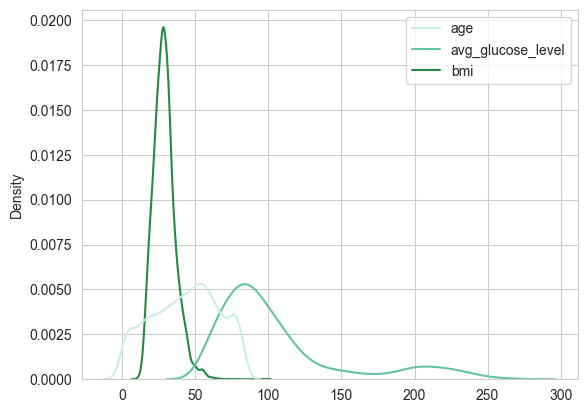

In [35]:
numerical_data = df[['age','avg_glucose_level','bmi']]
sns.kdeplot(data=numerical_data, palette='BuGn')

Text(0.5, 1.0, 'Stroke Patients By Work type')

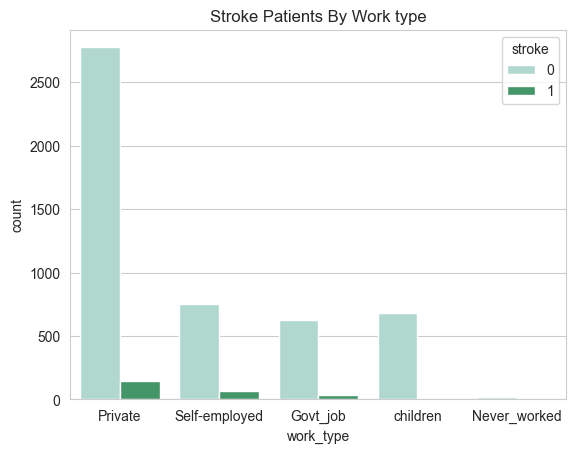

In [36]:
sns.countplot(x='work_type',hue='stroke',data=df, palette='BuGn').set_title("Stroke Patients By Work type")

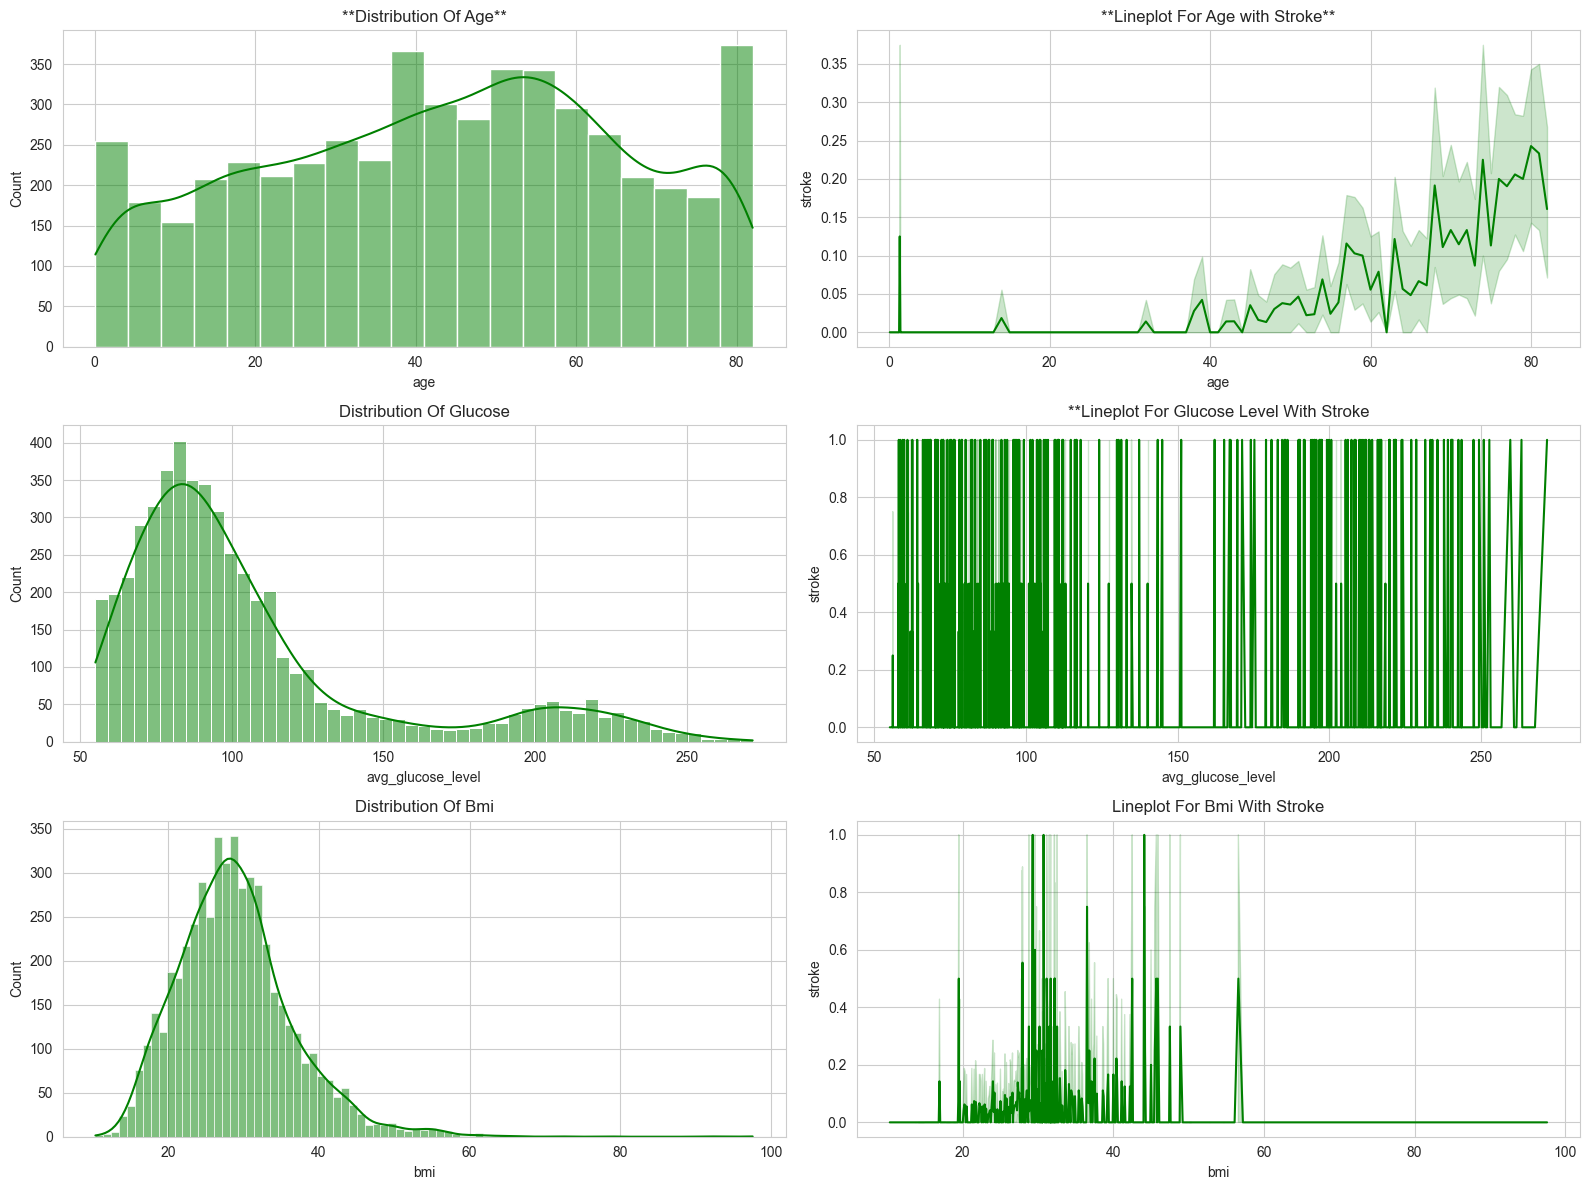

In [37]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))

sns.histplot(data=df, x='age', kde=True, ax=axes[0, 0],color='Green').set_title("**Distribution Of Age**")
sns.lineplot(data=df, x='age', y="stroke", ax=axes[0, 1],color='Green').set_title('**Lineplot For Age with Stroke**')

sns.histplot(data=df, x='avg_glucose_level', kde=True, ax=axes[1, 0],color='Green').set_title("Distribution Of Glucose")
sns.lineplot(data=df, x='avg_glucose_level', y="stroke", ax=axes[1, 1],color='Green').set_title('**Lineplot For Glucose Level With Stroke')
sns.histplot(data=df, x='bmi', kde=True, ax=axes[2, 0],color='Green').set_title("Distribution Of Bmi")
sns.lineplot(data=df, x='bmi', y="stroke", ax=axes[2, 1],color='Green').set_title('Lineplot For Bmi With Stroke')

plt.tight_layout()
plt.show()

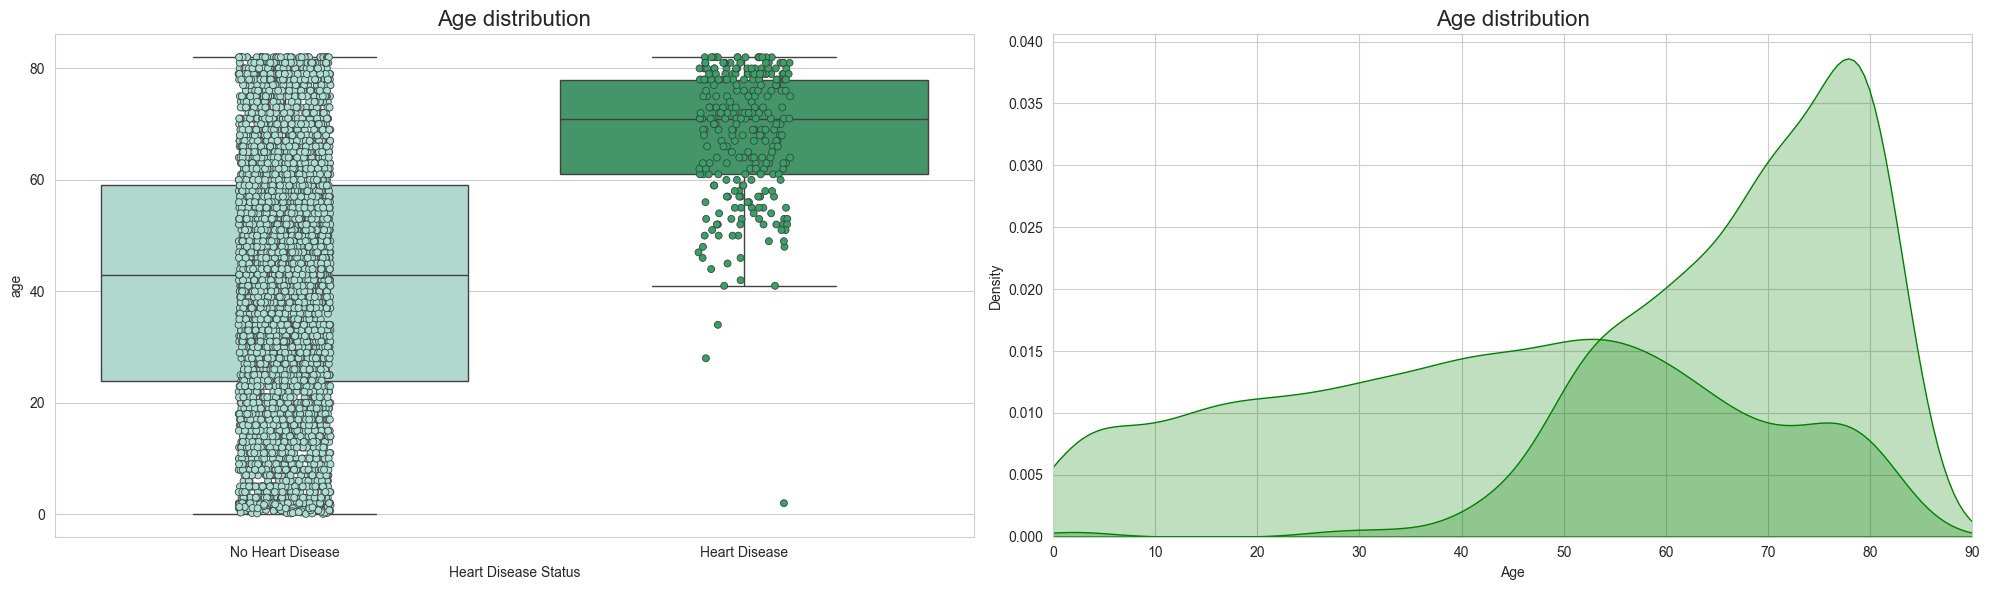

In [38]:
# set size
plt.figure(figsize=(20, 6))

# set palette
palette = 'BuGn'

plt.subplot(1, 2, 1)
sns.boxplot(x = 'heart_disease', y = 'age', data = df,
     palette = palette, fliersize = 0)

sns.stripplot(x = 'heart_disease', y = 'age', data = df,
     linewidth = 0.6, palette = palette)
plt.xticks( np.arange(2), ['No Heart Disease','Heart Disease'])
plt.title('Age distribution',fontsize= 16)
plt.xlabel('Heart Disease Status')


plt.subplot(1, 2, 2)

age_1_class = df[(df["age"] > 0) & 
                              (df["heart_disease"] == 0)]
age_2_class = df[(df["age"] > 0) & 
                              (df["heart_disease"] == 1)]

# Ploting the 3 variables that we create
sns.kdeplot(age_1_class["age"], shade=True, color='Green', label = 'No Heart Disease')
sns.kdeplot(age_2_class["age"], shade=True,  color='Green', label = 'Heart Disease')
plt.title('Age distribution',fontsize= 16)
plt.xlabel('Age')
plt.xlim(0, 90)
plt.tight_layout()
plt.show()

Text(0.5, 1.02, 'Feature Distribution')

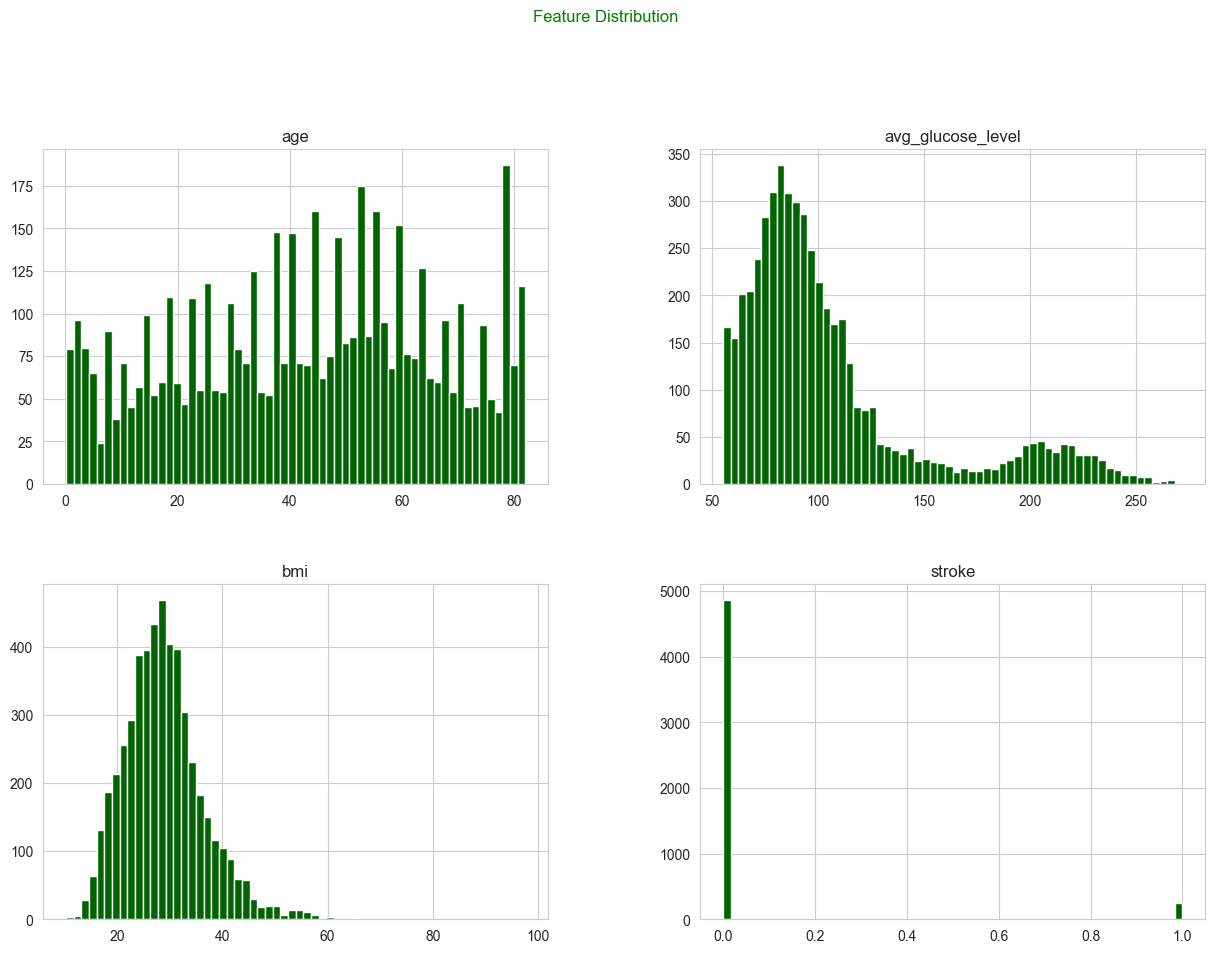

In [44]:
df.hist(bins = 60, figsize = (15, 10), color = 'DarkGreen')
plt.suptitle("Feature Distribution", x = 0.5, y = 1.02, ha = "center", color = 'Green')

Text(0.5, 1.0, 'Age vs BMI')

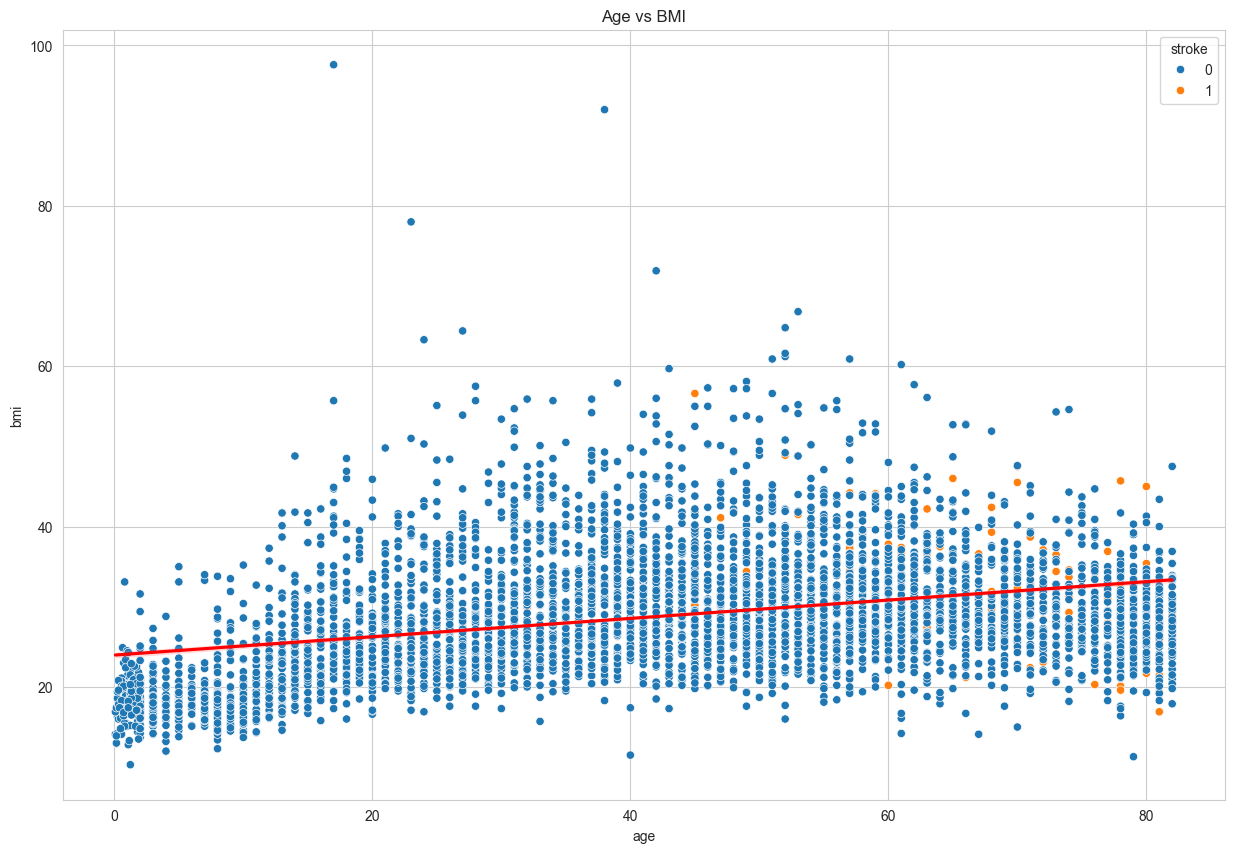

In [46]:
plt.figure(figsize = (15,10))
sns.scatterplot(data = df, x = 'age', y = 'bmi', hue = 'stroke')
sns.regplot(data = df, x = 'age', y = 'bmi', scatter = False, ci = 95, line_kws={"color": "red"})
plt.title('Age vs BMI')

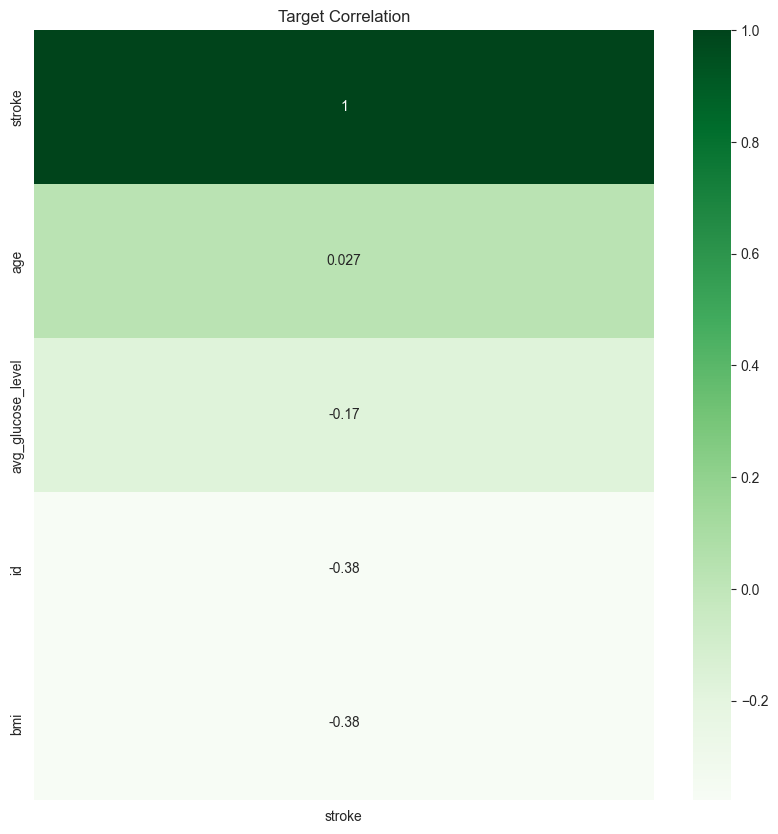

In [48]:
plt.figure(figsize = (10,10))
sns.heatmap(corr.corr()[['stroke']].sort_values(by='stroke', ascending=False), annot = True, cmap = 'Greens')
plt.title('Target Correlation')
plt.show()

#### DataPreprocessing


## One Hot Enconding(only categorical columns)

In [49]:
df_1 = df.copy()

In [50]:
df.describe(include = ['object', 'category'])

gender  hypertension  heart_disease ever_married work_type  \
count     5109          5109           5109         5109      5109   
unique       2             2              2            2         5   
top     Female             0              0          Yes   Private   
freq      2994          4611           4833         3353      2924   

       Residence_type smoking_status  
count            5109           5109  
unique              2              3  
top             Urban   never smoked  
freq             2596           3370

In [51]:
for col in categorical_columns:
    ### К колонкам с маленькой размерностью применим one-hot
    one_hot = pd.get_dummies(df[col], prefix=col, drop_first=True, dtype=int)
    df = pd.concat((df.drop(col, axis=1), one_hot), axis=1)

In [52]:
df.head()

age  avg_glucose_level    bmi  stroke  gender_Male  hypertension_1  \
0  67.0             228.69  36.60       1            1               0   
1  61.0             202.21  30.19       1            0               0   
2  80.0             105.92  32.50       1            1               0   
3  49.0             171.23  34.40       1            0               0   
4  79.0             174.12  24.00       1            0               1   

   heart_disease_1  ever_married_Yes  work_type_Never_worked  \
0                1                 1                       0   
1                0                 1                       0   
2                1                 1                       0   
3                0                 1                       0   
4                0                 1                       0   

   work_type_Private  work_type_Self-employed  work_type_children  \
0                  1                        0                   0   
1                  0                        1                   0   
2                  1                        0                   0   
3                  1                        0                   0   
4                  0                        1                   0   

   Residence_type_Urban  smoking_status_never smoked  smoking_status_smokes  
0                     1                            0                      0  
1                     0                            1                      0  
2                     0                            1                      0  
3                     1                            0                      1  
4                     0                            1                      0

In [53]:
X = df.drop('stroke', axis=1)
Y = df['stroke']  

In [54]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    random_state=0, 
                                                    test_size=0.2)

In [55]:
X_train.shape[0], X_test.shape[0]

(4087, 1022)

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

pipe_lr = Pipeline([('scaler', StandardScaler()),
                 ('LR', LogisticRegression(C = 1.02,penalty='l2'))])

pipe_lr.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('LR', LogisticRegression(C=1.02))])

In [73]:
pred = pipe_lr.predict(X_test)
y_preds = pipe_lr.predict_proba(X_test)
lr_score=accuracy_score(Y_test, pred)
lr_f1_score = f1_score(Y_test, pred) 
print('F1_score:',lr_f1_score)
print('Accuracy: ' ,accuracy_score(Y_test, pred))

F1_score: 0.03636363636363636
Accuracy:  0.9481409001956947


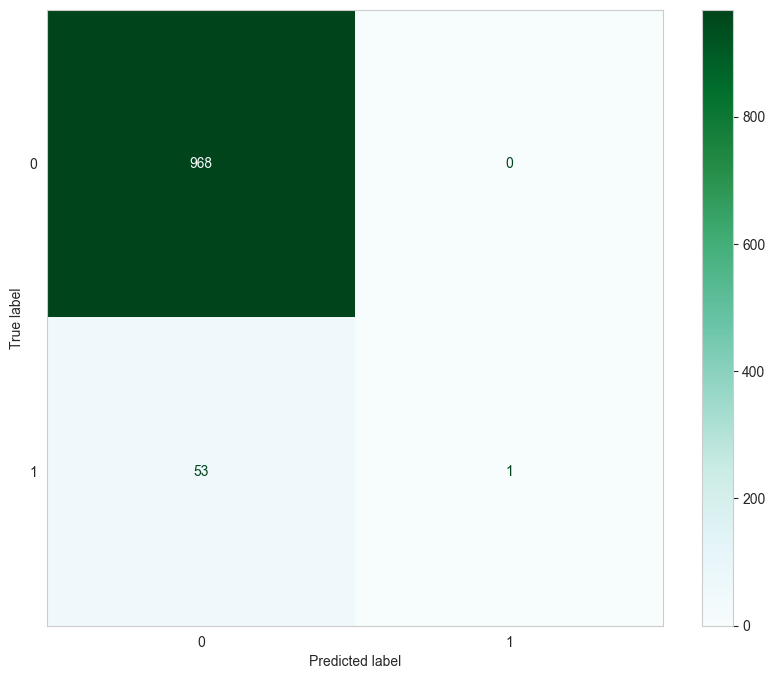

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, pipe_lr.predict(X_test), labels=pipe_lr.classes_)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Создаем один subplot
fig, ax = plt.subplots(figsize=(10,8))

# Используем ax для отображения матрицы ошибок
cmp.plot(include_values=True, cmap='BuGn', ax=ax, xticks_rotation='horizontal')
plt.grid(False)
plt.show()


In [67]:
from sklearn.model_selection import cross_validate


cv_result_pipe_2 = cross_validate(pipe_lr, X, Y, scoring='accuracy',
                                  cv=5, return_train_score=True)

print(f"Accuracy на трейне: {np.mean(cv_result_pipe_2['train_score']).round(4)}")
print(f"Accuracy на тесте: {np.mean(cv_result_pipe_2['test_score']).round(4)}")


Accuracy на трейне: 0.9515
Accuracy на тесте: 0.9515


In [68]:
from sklearn.model_selection import GridSearchCV
alphas = np.linspace(0.01, 100, 100)

param_grid ={
     'LR__C': alphas
 }


# ### Your code is here
clf = GridSearchCV(pipe_lr, param_grid, cv=5, scoring='accuracy')
clf.fit(X, Y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('LR', LogisticRegression(C=1.02))]),
             param_grid={'LR__C': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='accuracy')

In [69]:
clf.best_score_

0.951458510228451

In [70]:
clf.best_params_

{'LR__C': 1.02}

In [72]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


print(f'Accuracy равно: {accuracy_score(Y_test, pipe_lr.predict(X_test)):.3f}' )

print(f'Precision равно: {precision_score(Y_test, pipe_lr.predict(X_test)):.3f}' )

print(f'Recall равно: {recall_score(Y_test, pipe_lr.predict(X_test)):.3f}' )

print(f'F-мера равно: {f1_score(Y_test, pipe_lr.predict(X_test)):.3f}' )

Accuracy равно: 0.948
Precision равно: 1.000
Recall равно: 0.019
F-мера равно: 0.036


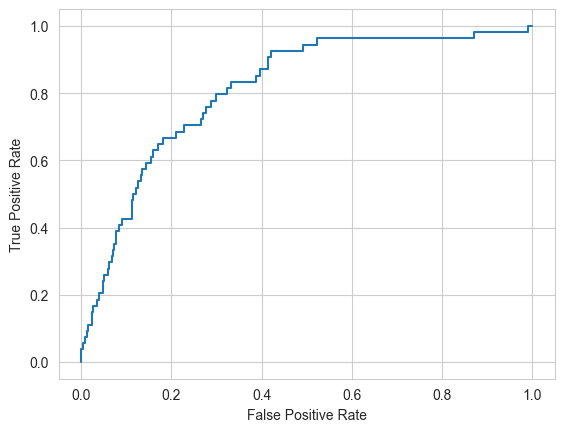

In [76]:
from sklearn.metrics import roc_curve, precision_recall_curve

fpr, tpr, thresholds = roc_curve(Y_test, pipe_lr.predict_proba(X_test)[:, 1])

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [77]:
from sklearn.metrics import auc

auc(fpr, tpr)

0.8113904193449648

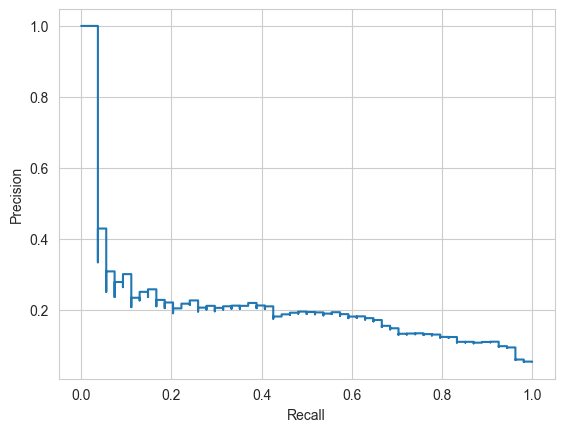

In [78]:

precision, recall, thresholds = precision_recall_curve(Y_test, pipe_lr.predict_proba(X_test)[:, 1])

from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay(precision=precision, recall=recall).plot()

In [79]:
auc(recall, precision)

0.20774908353921684

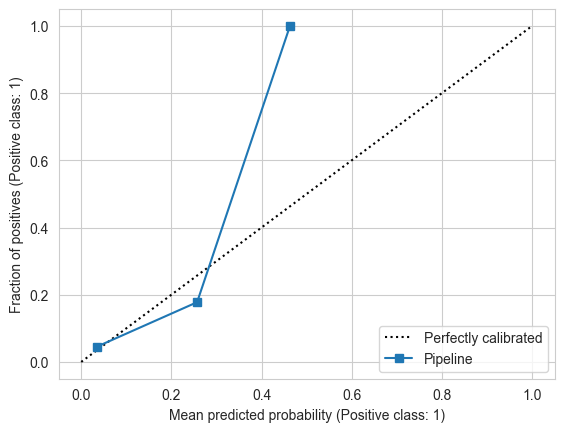

In [80]:
from sklearn.calibration import CalibrationDisplay

CalibrationDisplay.from_estimator(pipe_lr, X_test, Y_test)

### SMOTE

In [103]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, Y_smote = smote.fit_resample(X,Y)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, Y_smote, test_size=0.2)

In [104]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train==0)))

Before OverSampling, counts of label '1': 195
Before OverSampling, counts of label '0': 3892 


In [105]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train_smote==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train_smote==0)))

Before OverSampling, counts of label '1': 3898
Before OverSampling, counts of label '0': 3878 


In [109]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

pipe_lr = Pipeline([('scaler', StandardScaler()),
                 ('LR', LogisticRegression(C = 1.02,penalty='l2'))])

pipe_lr.fit(X_train_smote, y_train_smote)

Pipeline(steps=[('scaler', StandardScaler()),
                ('LR', LogisticRegression(C=1.02))])

In [112]:
pred = pipe_lr.predict(X_test_smote)
y_preds = pipe_lr.predict_proba(X_test)
lr_score=accuracy_score(y_test_smote, pred)
lr_f1_score=f1_score(y_test_smote, pred) 
print('F1_score:', lr_f1_score)
print('Accuracy:', lr_score)

F1_score: 0.8737764039155075
Accuracy: 0.8739711934156379


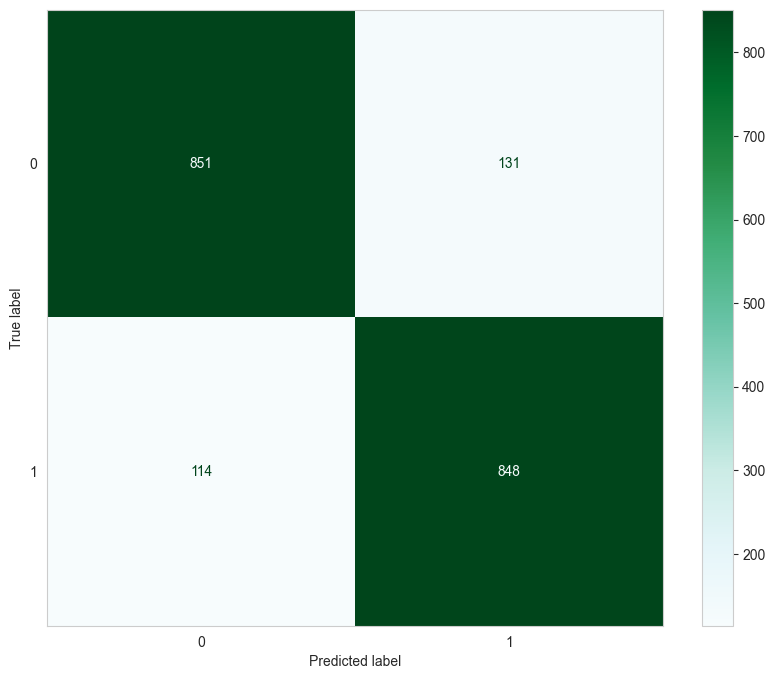

In [113]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_smote, pipe_lr.predict(X_test_smote), labels=pipe_lr.classes_)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Создаем один subplot
fig, ax = plt.subplots(figsize=(10,8))

# Используем ax для отображения матрицы ошибок
cmp.plot(include_values=True, cmap='BuGn', ax=ax, xticks_rotation='horizontal')
plt.grid(False)
plt.show()

In [114]:
print(f'Accuracy равно: {accuracy_score(y_test_smote, pipe_lr.predict(X_test_smote)):.3f}' )

print(f'Precision равно: {precision_score(y_test_smote, pipe_lr.predict(X_test_smote)):.3f}' )

print(f'Recall равно: {recall_score(y_test_smote, pipe_lr.predict(X_test_smote)):.3f}' )

print(f'F-мера равно: {f1_score(y_test_smote, pipe_lr.predict(X_test_smote)):.3f}' )

Accuracy равно: 0.874
Precision равно: 0.866
Recall равно: 0.881
F-мера равно: 0.874


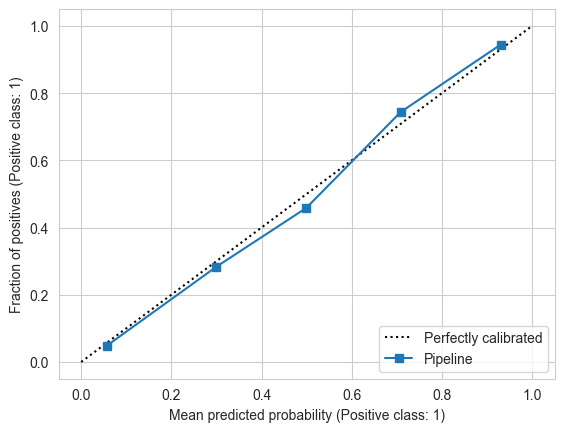

In [138]:
from sklearn.calibration import CalibrationDisplay

CalibrationDisplay.from_estimator(pipe_lr, X_test_smote, y_test_smote)

In [139]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

PCA_dataset = pca.fit_transform(X)

PCA_dataset = pd.DataFrame(PCA_dataset, columns=['PCA_1', 'PCA_2'])

PCA_dataset.head()

PCA_1      PCA_2
0  124.938101  -4.989832
1   97.647308  -2.519354
2    5.562190 -36.513513
3   65.350751   3.907633
4   72.469841 -23.873180

In [140]:
first_component_corr = X.corrwith(PCA_dataset.PCA_1)
second_component_corr = X.corrwith(PCA_dataset.PCA_2)


corrs = pd.concat((first_component_corr, second_component_corr),
                  axis=1)

corrs.columns = ['PCA_1', 'PCA_2']

corrs

PCA_1     PCA_2
age                          0.197933 -0.593421
avg_glucose_level            0.657974  0.020750
bmi                          0.119587 -0.195030
gender_Male                  0.027743  0.008171
hypertension_1               0.120750 -0.151701
heart_disease_1              0.133903 -0.148065
ever_married_Yes             0.131451 -0.412098
work_type_Never_worked      -0.007106  0.043769
work_type_Private            0.019703 -0.071743
work_type_Self-employed      0.058991 -0.183899
work_type_children          -0.092184  0.365605
Residence_type_Urban        -0.003119 -0.009841
smoking_status_never smoked -0.043361  0.170933
smoking_status_smokes        0.001770 -0.055103

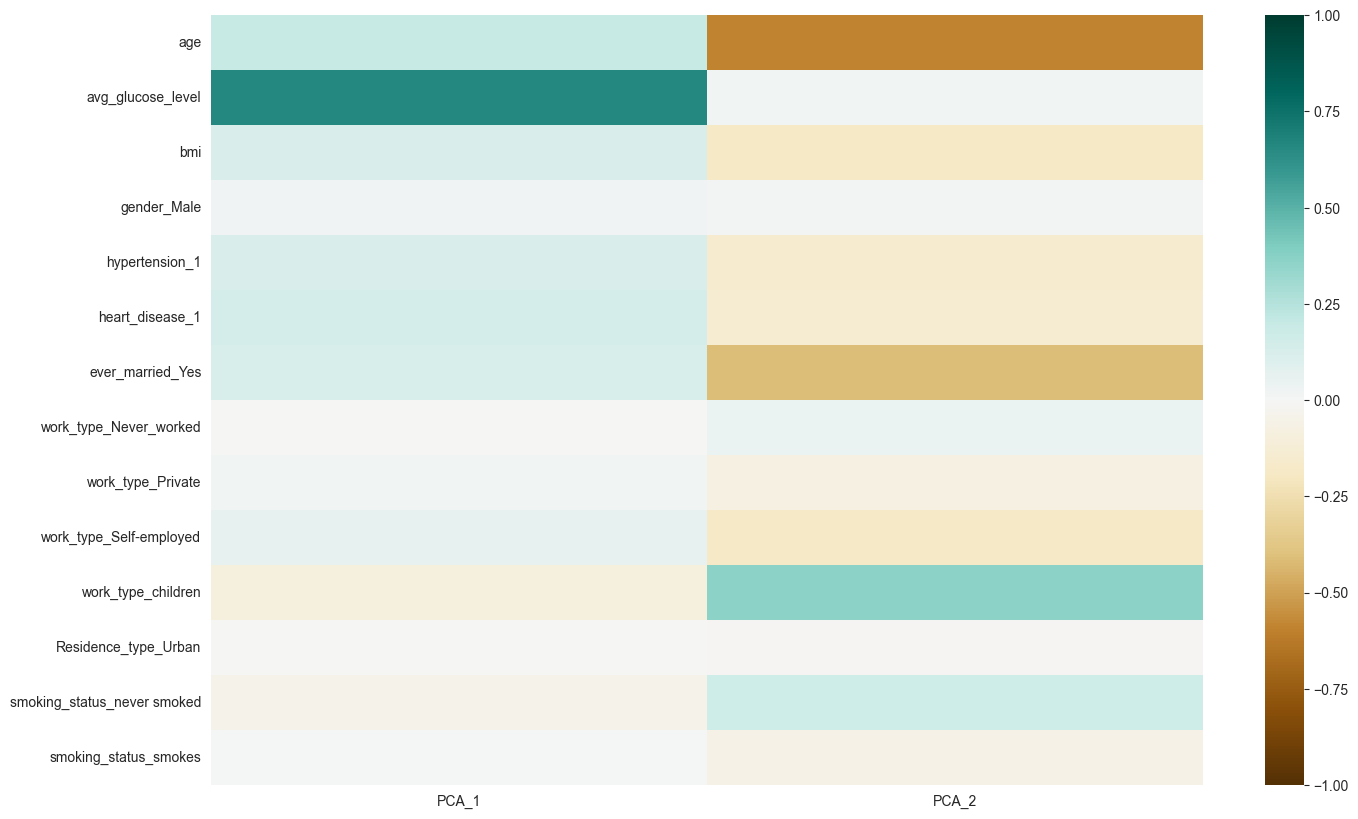

In [141]:
import seaborn as sns

fig = plt.figure()

fig.set_size_inches(16, 10)

sns.heatmap(corrs, 
            xticklabels=corrs.columns,
            yticklabels=corrs.index,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()

In [142]:
PCA_dataset = np.concatenate((PCA_dataset.values, Y.values.reshape(-1, 1)),
                              axis=1)

PCA_dataset = pd.DataFrame(PCA_dataset, columns=['PCA1', 'PCA2', 'STROKE'])

In [143]:
PCA_dataset

PCA1       PCA2  STROKE
0     124.938101  -4.989832     1.0
1      97.647308  -2.519354     1.0
2       5.562190 -36.513513     1.0
3      65.350751   3.907633     1.0
4      72.469841 -23.873180     1.0
...          ...        ...     ...
5104  -16.456622 -39.566723     0.0
5105   25.007403 -35.330750     0.0
5106  -24.070217   4.243538     0.0
5107   60.483476   2.180169     0.0
5108  -20.573377  -3.716734     0.0

[5109 rows x 3 columns]

<Axes: xlabel='PCA1', ylabel='PCA2'>

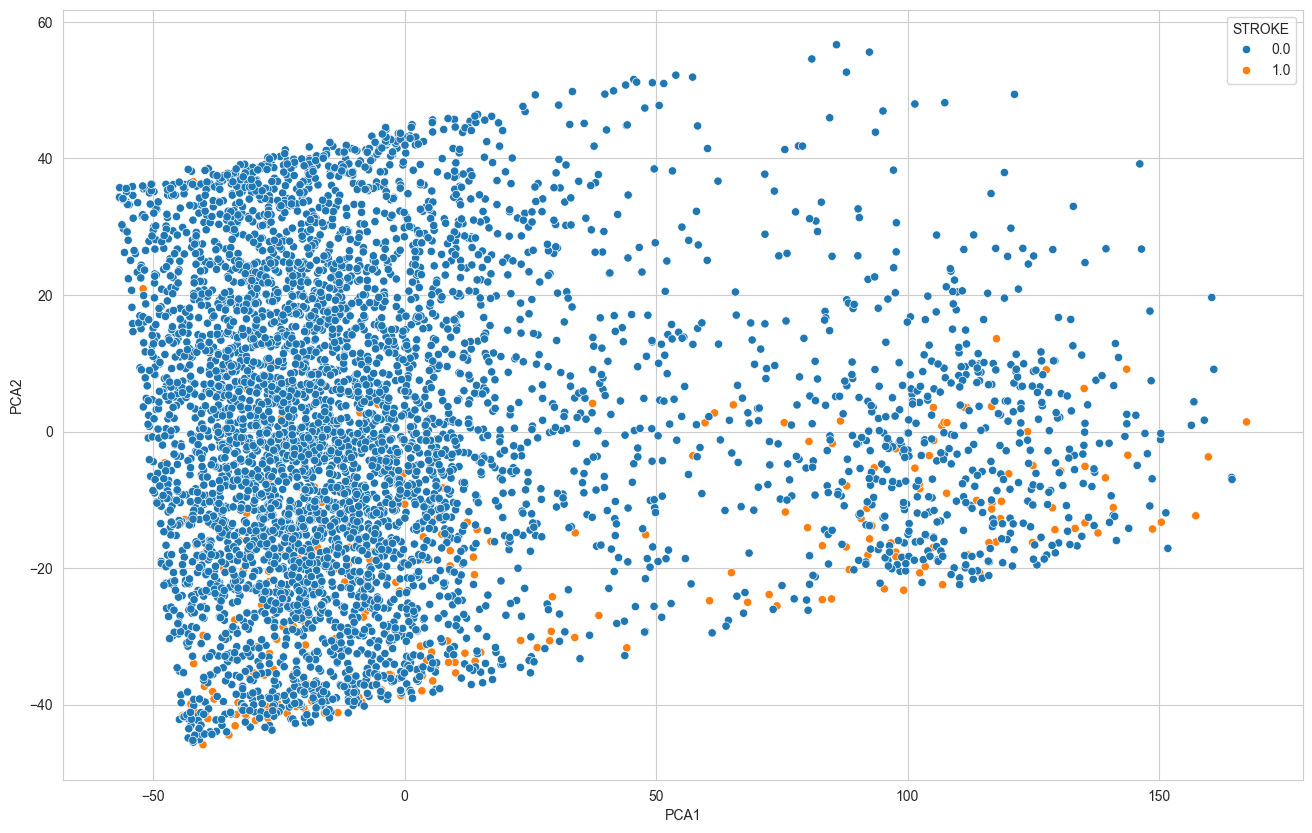

In [144]:
fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.scatterplot(data=PCA_dataset, x="PCA1", y="PCA2", hue="STROKE")

In [145]:
pca_3d = PCA(n_components=3)

pca_3d.fit(X)

PCA_dataset_3d = pca_3d.transform(X)

PCA_dataset_3d = pd.DataFrame(PCA_dataset_3d, columns=['PCA_1', 'PCA_2', 'PCA_3'])

PCA_dataset_3d.head()

PCA_1      PCA_2      PCA_3
0  124.938101  -4.989832   2.915533
1   97.647308  -2.519354  -2.340905
2    5.562190 -36.513513  -0.793153
3   65.350751   3.907633   3.762309
4   72.469841 -23.873180 -10.179228

In [146]:
first_component_corr_3d = X.corrwith(PCA_dataset_3d.PCA_1)
second_component_corr_3d = X.corrwith(PCA_dataset_3d.PCA_2)
third_component_corr_3d = X.corrwith(PCA_dataset_3d.PCA_3)

corrs_3d = pd.concat((first_component_corr_3d, 
                      second_component_corr_3d, 
                      third_component_corr_3d), axis=1)

corrs_3d.columns = ['PCA_1', 'PCA_2', 'PCA_3']

corrs_3d

PCA_1     PCA_2     PCA_3
age                          0.197933 -0.593421 -0.040588
avg_glucose_level            0.657974  0.020750 -0.013827
bmi                          0.119587 -0.195030  0.589817
gender_Male                  0.027743  0.008171 -0.023128
hypertension_1               0.120750 -0.151701  0.029278
heart_disease_1              0.133903 -0.148065 -0.042918
ever_married_Yes             0.131451 -0.412098  0.055762
work_type_Never_worked      -0.007106  0.043769 -0.006570
work_type_Private            0.019703 -0.071743  0.105284
work_type_Self-employed      0.058991 -0.183899 -0.027723
work_type_children          -0.092184  0.365605 -0.134311
Residence_type_Urban        -0.003119 -0.009841  0.013592
smoking_status_never smoked -0.043361  0.170933 -0.043055
smoking_status_smokes        0.001770 -0.055103  0.038837

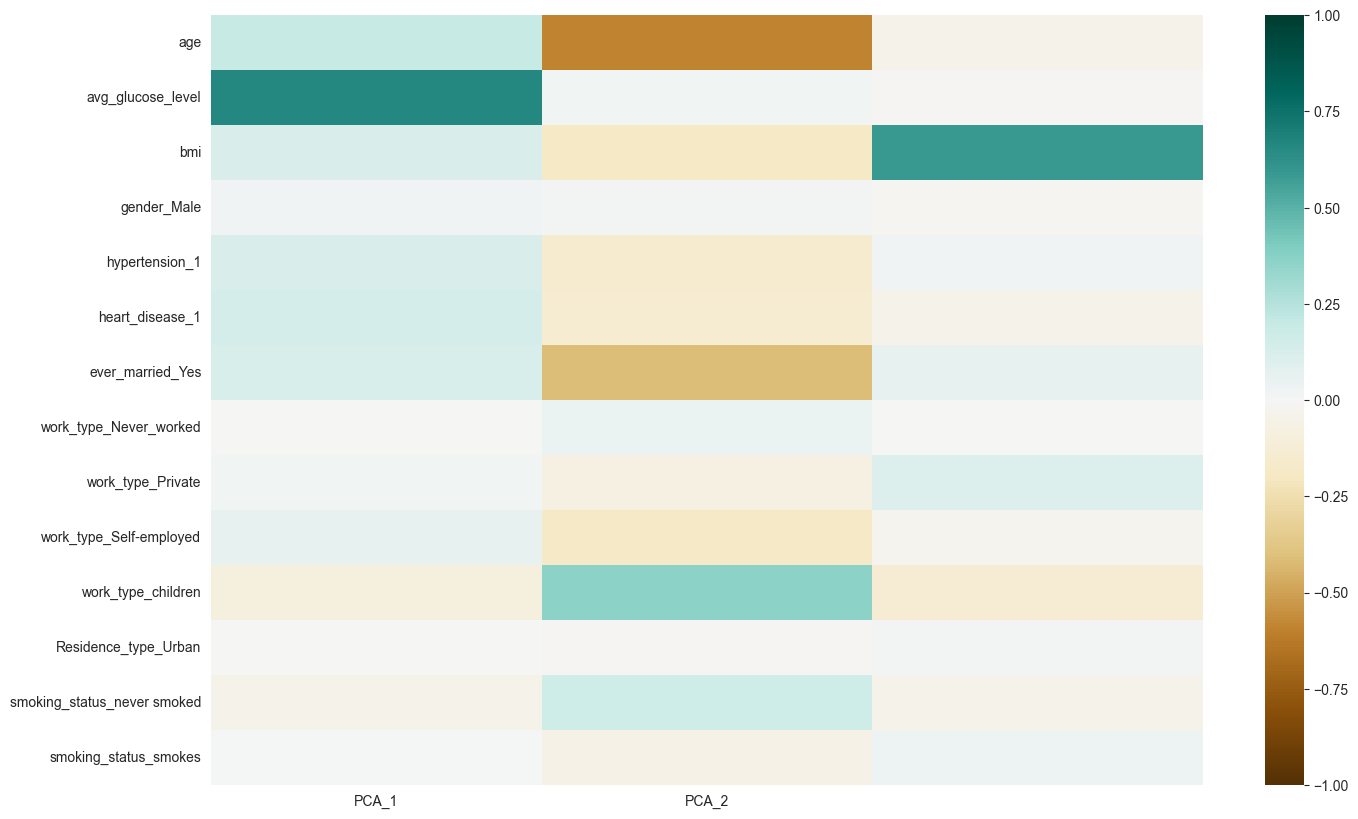

In [147]:
fig = plt.figure()

fig.set_size_inches(16, 10)

sns.heatmap(corrs_3d, 
            xticklabels=corrs.columns,
            yticklabels=corrs.index,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()

In [148]:
PCA_dataset_3d = np.concatenate((PCA_dataset_3d.values, Y.values.reshape(-1, 1)),
                                 axis=1)

PCA_dataset_3d = pd.DataFrame(PCA_dataset_3d, columns=['PCA_1', 'PCA_2', 'PCA_3', 'STROKE'])

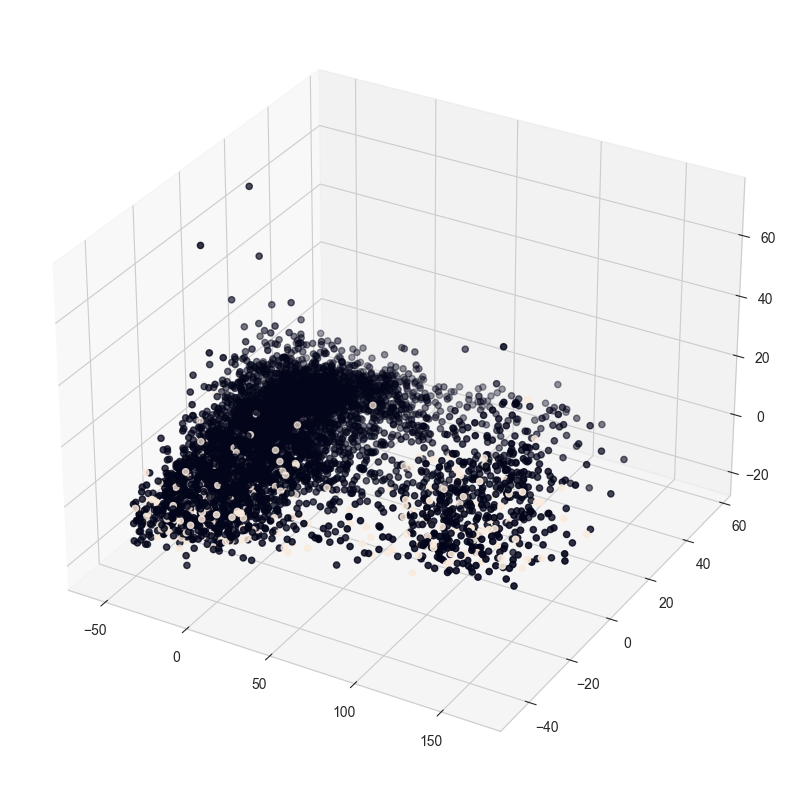

In [149]:
fig = plt.figure()
fig.set_size_inches(16, 10)

ax = plt.axes(projection='3d')

colors = PCA_dataset_3d['STROKE'].replace(['A', 'B', 'C', 'D'],
                                            ['orange', 'green', 'red', 'rose'])

ax.scatter3D(PCA_dataset_3d['PCA_1'], 
             PCA_dataset_3d['PCA_2'],
             PCA_dataset_3d['PCA_3'], 
             c=colors)

In [150]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2).fit_transform(X)

X_tsne

array([[ 84.210846  ,  -0.62848806],
       [ 67.64758   ,  -1.2218769 ],
       [ 22.852472  , -38.733253  ],
       ...,
       [-25.303389  ,  13.609845  ],
       [ 50.968246  ,  -1.8017004 ],
       [-18.998207  ,  -4.7811794 ]], dtype=float32)

In [151]:
### Преобразуем в pd.DataFrame

X_tsne = np.concatenate((X_tsne, Y.values.reshape(-1, 1)),
                               axis=1)

X_tsne = pd.DataFrame(X_tsne, columns=['Tsne_1st_component',
                                       'Tsne_2nd_component',
                                       'STROKE'])

<Axes: xlabel='Tsne_1st_component', ylabel='Tsne_2nd_component'>

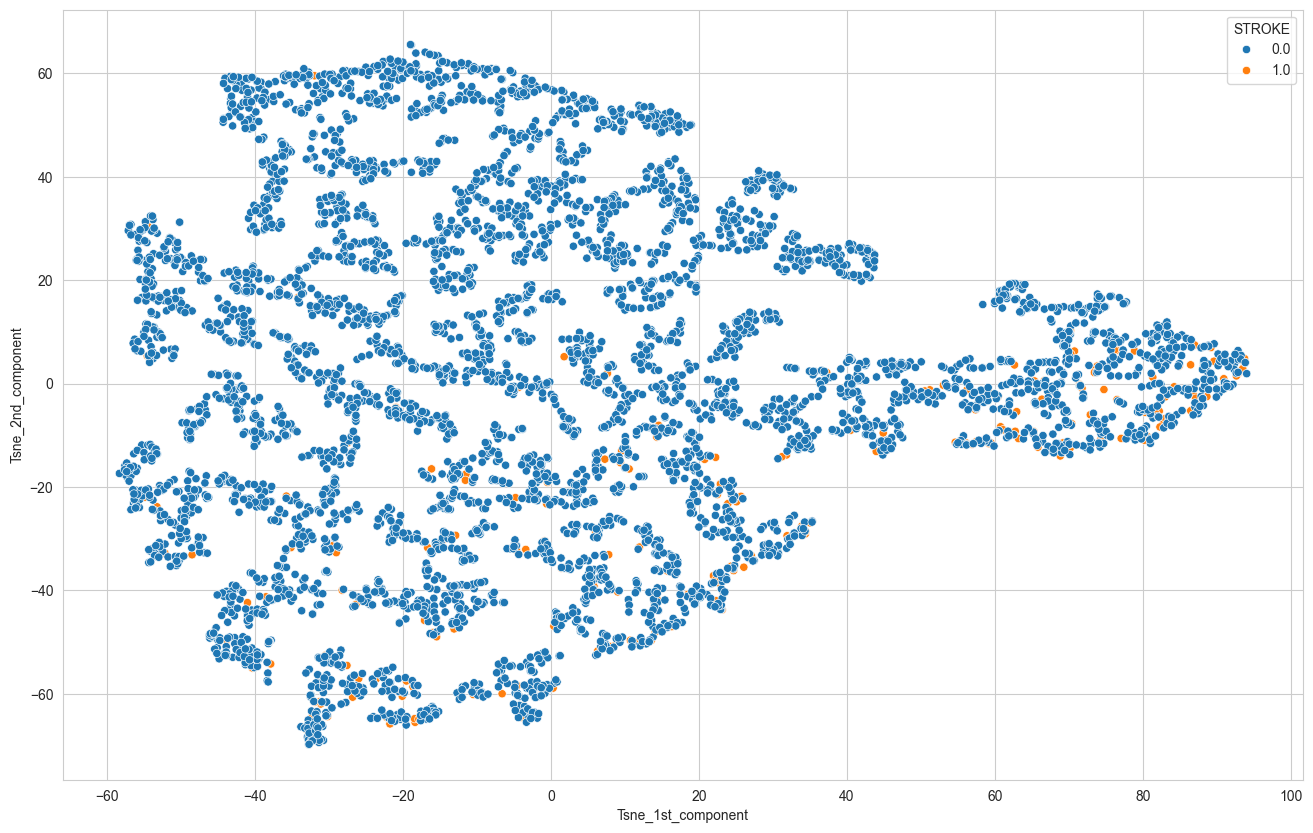

In [152]:
fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.scatterplot(data=X_tsne, x="Tsne_1st_component", 
                y="Tsne_2nd_component", 
                hue="STROKE")

<Axes: xlabel='Tsne_1st_component', ylabel='Tsne_2nd_component'>

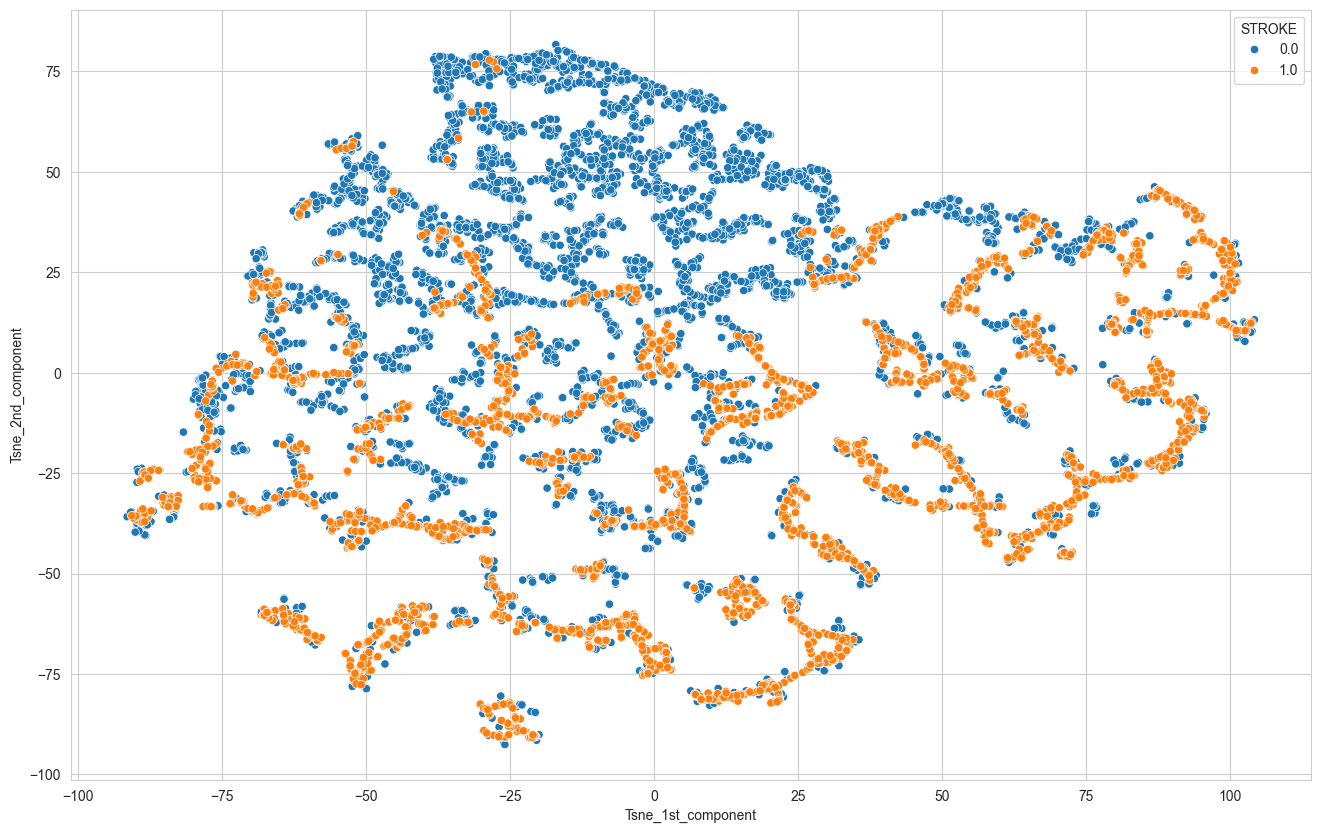

In [153]:
X_tsne_smote = TSNE(n_components=2).fit_transform(X_smote)
X_tsne_smote = np.concatenate((X_tsne_smote, Y_smote.values.reshape(-1, 1)),
                               axis=1)

X_tsne_smote = pd.DataFrame(X_tsne_smote, columns=['Tsne_1st_component',
                                       'Tsne_2nd_component',
                                       'STROKE'])
fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.scatterplot(data=X_tsne_smote, x="Tsne_1st_component", 
                y="Tsne_2nd_component", 
                hue="STROKE")

In [154]:
pca_sm = PCA(n_components=2)

PCA_dataset_sm = pca_sm.fit_transform(X_smote)

PCA_dataset_sm = pd.DataFrame(PCA_dataset_sm, columns=['PCA_1', 'PCA_2'])

first_component_corr_sm = X_smote.corrwith(PCA_dataset_sm.PCA_1)
second_component_corr_sm = X_smote.corrwith(PCA_dataset_sm.PCA_2)
corrs_sm = pd.concat((first_component_corr_sm, second_component_corr_sm),
                  axis=1)

corrs_sm.columns = ['PCA_1', 'PCA_2']
corrs_sm

PCA_1     PCA_2
age                          0.317207 -0.948253
avg_glucose_level            0.998777  0.049348
bmi                          0.265298 -0.144290
gender_Male                  0.032992  0.153213
hypertension_1               0.112085 -0.115744
heart_disease_1              0.203840 -0.090728
ever_married_Yes             0.228766 -0.427153
work_type_Never_worked      -0.023737  0.080707
work_type_Private            0.047820  0.088769
work_type_Self-employed     -0.040484 -0.178805
work_type_children          -0.153279  0.589381
Residence_type_Urban        -0.045850  0.093675
smoking_status_never smoked -0.153886  0.290243
smoking_status_smokes       -0.038171  0.079814

<Axes: xlabel='PCA1', ylabel='PCA2'>

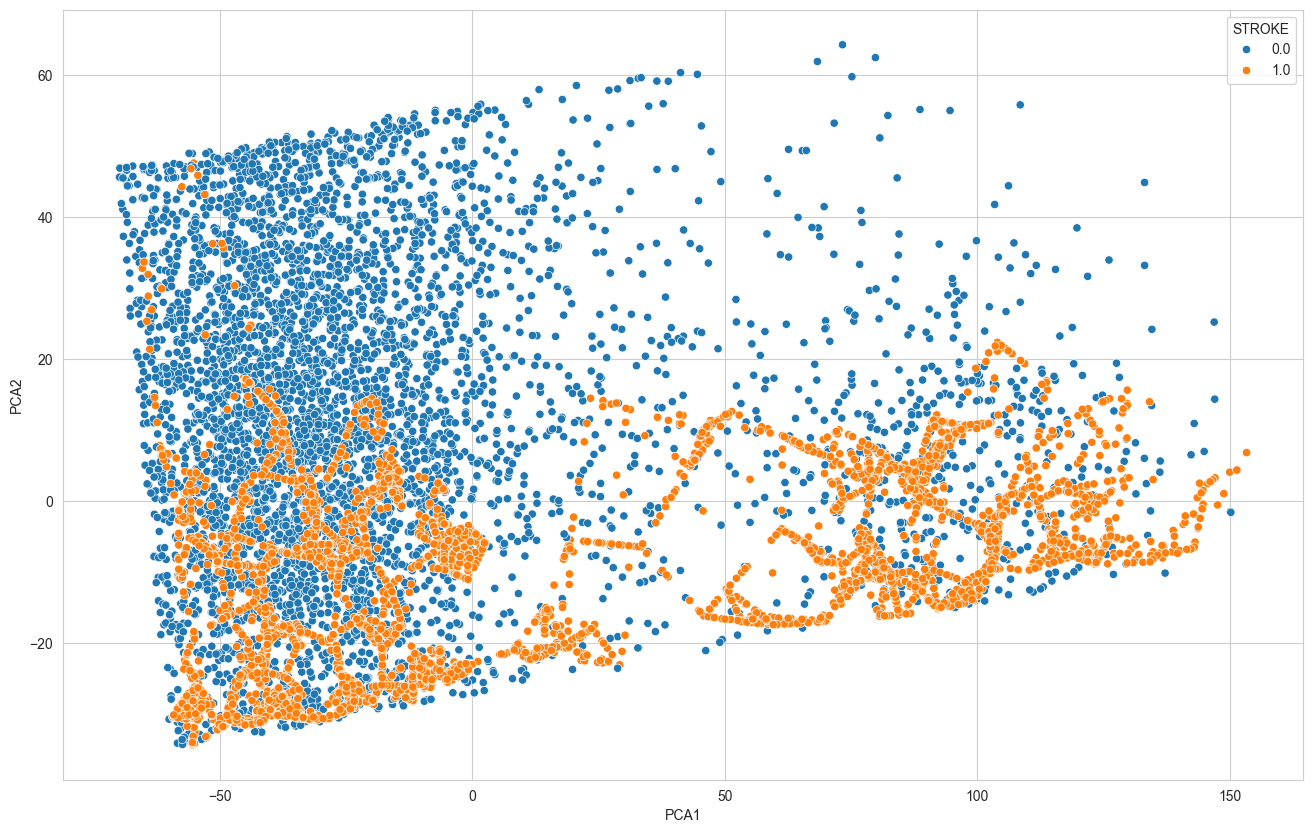

In [155]:
PCA_dataset_sm = np.concatenate((PCA_dataset_sm.values, Y_smote.values.reshape(-1, 1)),
                              axis=1)

PCA_dataset_sm = pd.DataFrame(PCA_dataset_sm, columns=['PCA1', 'PCA2', 'STROKE'])
fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.scatterplot(data=PCA_dataset_sm, x="PCA1", y="PCA2", hue="STROKE")

In [156]:
pca_3d_sm = PCA(n_components=3)

pca_3d_sm.fit(X_smote)

PCA_dataset_3d_sm = pca_3d.transform(X_smote)

PCA_dataset_3d_sm = pd.DataFrame(PCA_dataset_3d_sm, columns=['PCA_1', 'PCA_2', 'PCA_3'])

PCA_dataset_3d_sm.head()

PCA_1      PCA_2      PCA_3
0  124.938101  -4.989832   2.915533
1   97.647308  -2.519354  -2.340905
2    5.562190 -36.513513  -0.793153
3   65.350751   3.907633   3.762309
4   72.469841 -23.873180 -10.179228

In [157]:
first_component_corr_3d_sm = X_smote.corrwith(PCA_dataset_3d_sm.PCA_1)
second_component_corr_3d_sm = X_smote.corrwith(PCA_dataset_3d_sm.PCA_2)
third_component_corr_3d_sm = X_smote.corrwith(PCA_dataset_3d_sm.PCA_3)

corrs_3d_sm = pd.concat((first_component_corr_3d_sm, 
                      second_component_corr_3d_sm, 
                      third_component_corr_3d_sm), axis=1)

corrs_3d_sm.columns = ['PCA_1', 'PCA_2', 'PCA_3']

corrs_3d_sm

PCA_1     PCA_2     PCA_3
age                          0.327156 -0.922505 -0.228539
avg_glucose_level            0.998203  0.121035  0.018194
bmi                          0.266887 -0.144885  0.897141
gender_Male                  0.031383  0.155012  0.039073
hypertension_1               0.113306 -0.108918  0.044891
heart_disease_1              0.204781 -0.075298 -0.044537
ever_married_Yes             0.233256 -0.412393  0.033102
work_type_Never_worked      -0.024585  0.079019  0.007303
work_type_Private            0.046899  0.088098  0.194708
work_type_Self-employed     -0.038595 -0.181453 -0.031128
work_type_children          -0.159492  0.582741 -0.142554
Residence_type_Urban        -0.046827  0.089810  0.032455
smoking_status_never smoked -0.156930  0.279739  0.000931
smoking_status_smokes       -0.039000  0.075067  0.098493

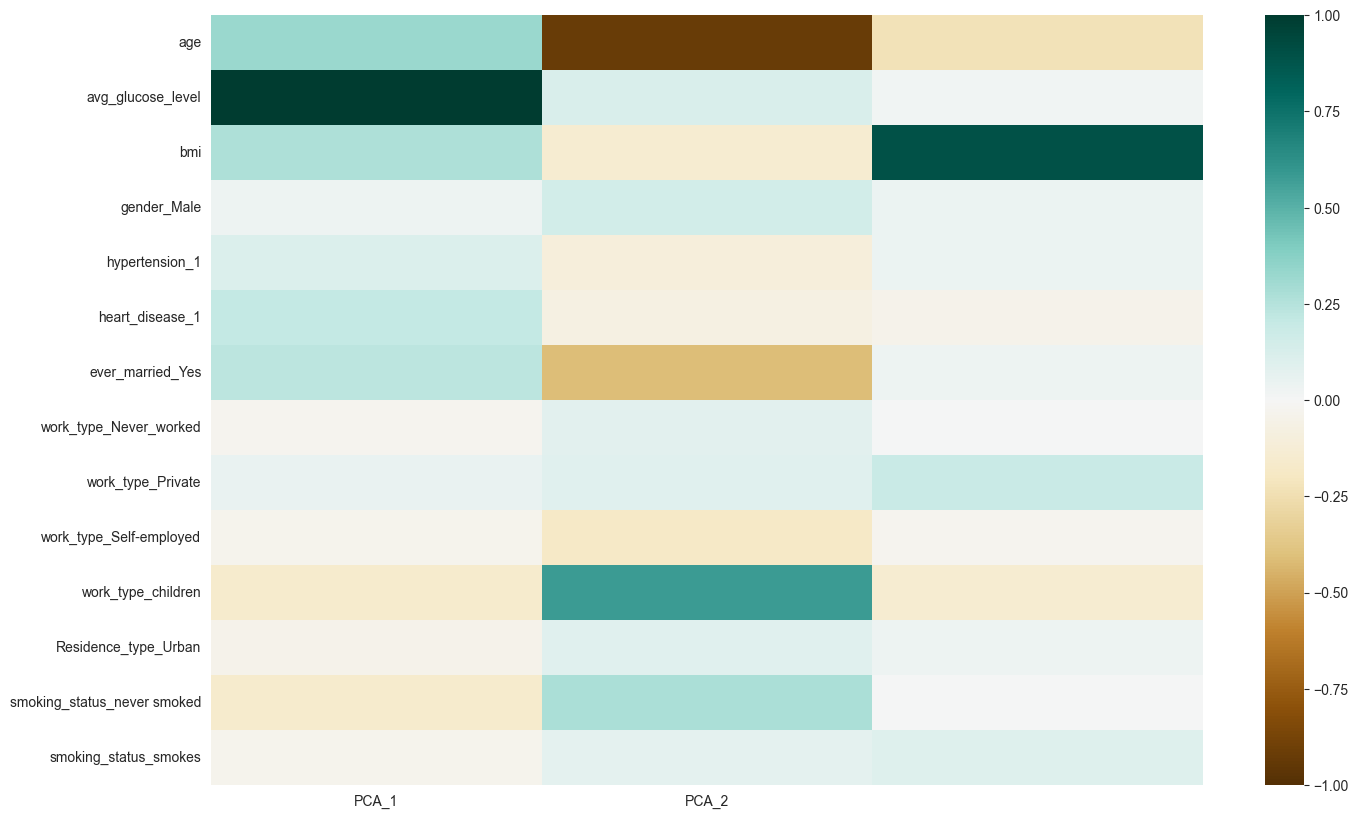

In [158]:
fig = plt.figure()

fig.set_size_inches(16, 10)

sns.heatmap(corrs_3d_sm, 
            xticklabels=corrs.columns,
            yticklabels=corrs.index,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()

In [159]:
PCA_dataset_3d_sm = np.concatenate((PCA_dataset_3d_sm.values, Y_smote.values.reshape(-1, 1)),
                                 axis=1)

PCA_dataset_3d_sm = pd.DataFrame(PCA_dataset_3d_sm, columns=['PCA_1', 'PCA_2', 'PCA_3', 'STROKE'])

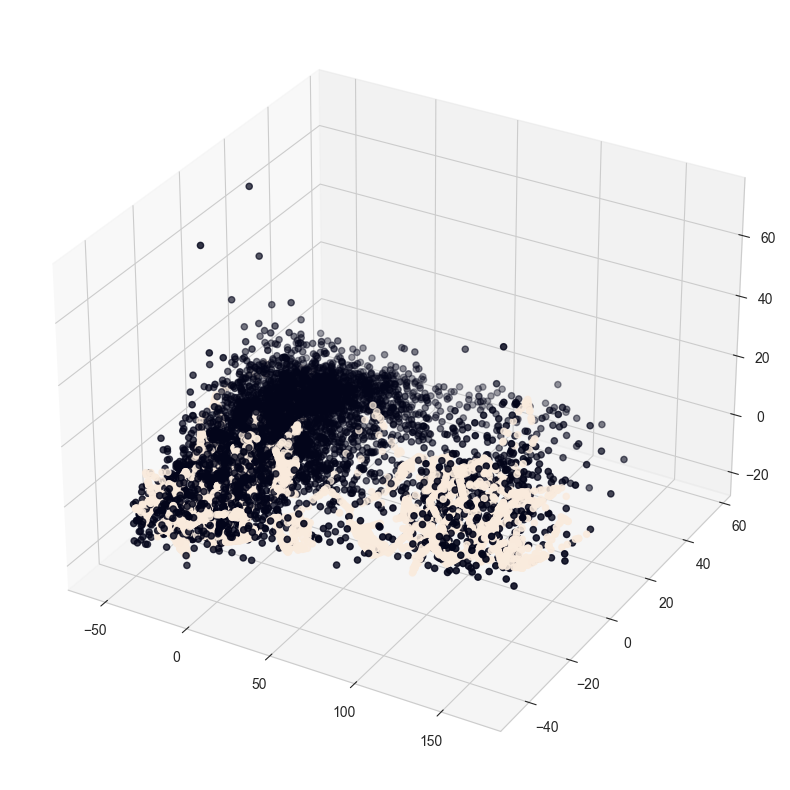

In [160]:
fig = plt.figure()
fig.set_size_inches(16, 10)

ax = plt.axes(projection='3d')

colors = PCA_dataset_3d_sm['STROKE'].replace(['A', 'B', 'C', 'D'],
                                            ['orange', 'green', 'red', 'blue'])

ax.scatter3D(PCA_dataset_3d_sm['PCA_1'], 
             PCA_dataset_3d_sm['PCA_2'],
             PCA_dataset_3d_sm['PCA_3'], 
             c=colors)

# SVC

In [161]:
from sklearn.svm import LinearSVC
pipe_svm = Pipeline([('scaler', MinMaxScaler()),
                    ('linear_svc', LinearSVC())])
pipe_svm.fit(X_train_smote, y_train_smote)
pipe_svm.score(X_test_smote,y_test_smote)

0.8729423868312757

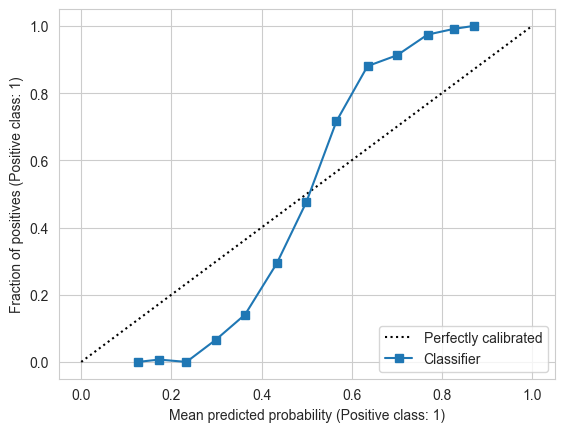

In [162]:
def sigmoid(output):
    return 1 / (1 + np.exp(-output))


pred_prob = sigmoid(pipe_svm.decision_function(X_test_smote))

### Your code is here
CalibrationDisplay.from_predictions(y_test_smote, pred_prob, n_bins=15)

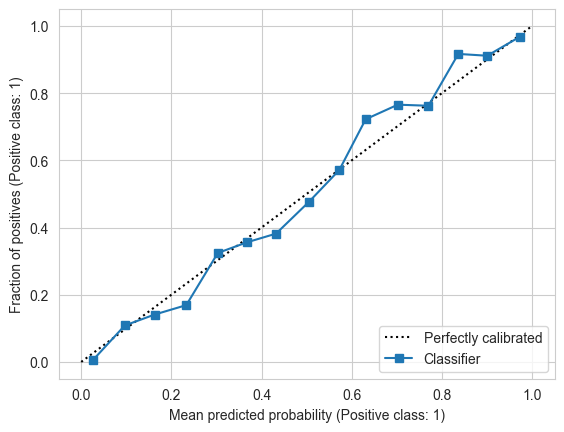

In [163]:
from sklearn.calibration import CalibratedClassifierCV

### Your code is here

calibration = CalibratedClassifierCV(pipe_svm, cv=5, method='sigmoid')
calibration.fit(X_train_smote, y_train_smote)

calibrated_probs = calibration.predict_proba(X_test_smote)[:, 1]
CalibrationDisplay.from_predictions(y_test_smote, calibrated_probs, n_bins=15)

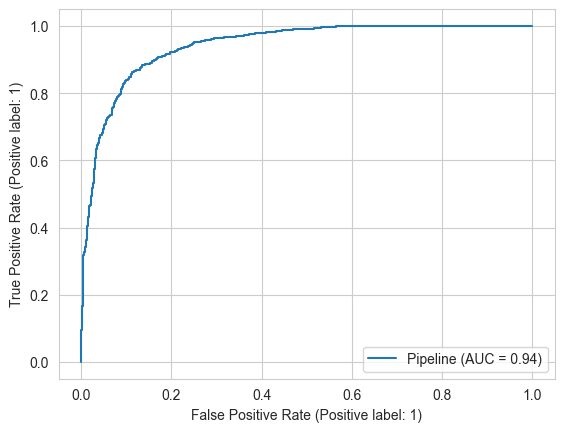

In [208]:
RocCurveDisplay.from_estimator(pipe_svm, X_test_smote, y_test_smote)

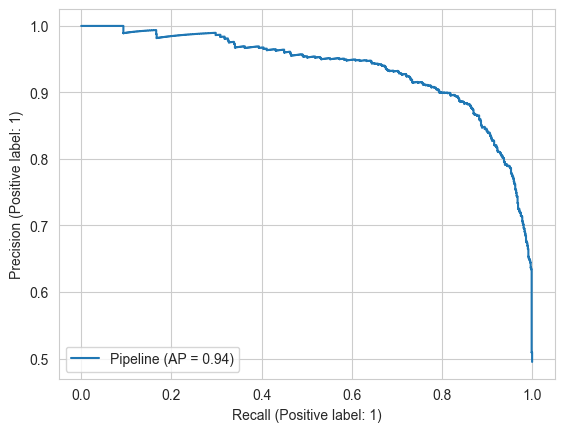

In [165]:
PrecisionRecallDisplay.from_estimator(pipe_svm, X_test_smote, y_test_smote)

In [166]:
y_pred = pipe_svm.predict(X_test_smote)
print(classification_report(y_pred, y_test_smote))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       965
           1       0.88      0.87      0.87       979

    accuracy                           0.87      1944
   macro avg       0.87      0.87      0.87      1944
weighted avg       0.87      0.87      0.87      1944


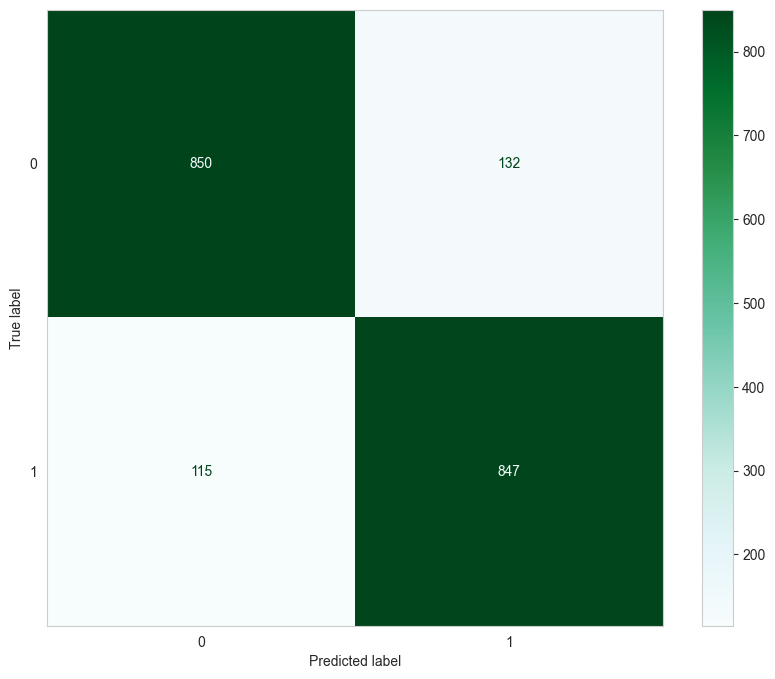

In [167]:
cm = confusion_matrix(y_test_smote, pipe_svm.predict(X_test_smote), labels=pipe_svm.classes_)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Создаем один subplot
fig, ax = plt.subplots(figsize=(10,8))

# Используем ax для отображения матрицы ошибок
cmp.plot(include_values=True, cmap='BuGn', ax=ax, xticks_rotation='horizontal')
plt.grid(False)
plt.show()

### KNN

In [209]:
def kernel(distances, h=1):
    
        const = 1 / (np.sqrt(2 * np.pi))
        power = (-1/2) * (distances ** 2) / h ** 2
    
        return const * np.exp(power)

In [210]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

splitter = KFold(n_splits=5, shuffle=True, random_state=33)

knn = KNeighborsClassifier(n_neighbors=2, weights=kernel) 

knn_cv = cross_validate(knn, X_train_smote, y_train_smote, 
                        cv=splitter, scoring='neg_mean_squared_error',
                        return_train_score=True)

In [212]:
print(f"\nСреднее MSE KNN модели на трейне: {-np.mean(knn_cv['train_score']).round(3)}")
print(f"Среднее MSE KNN модели на тесте: {-np.mean(knn_cv['test_score']).round(3)}")


Среднее MSE KNN модели на трейне: -0.0
Среднее MSE KNN модели на тесте: 0.086


In [213]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_validate, cross_val_predict
from sklearn.metrics import accuracy_score

splitter = KFold(n_splits=5, shuffle=True, random_state=33)

knn = KNeighborsClassifier(n_neighbors=2)


knn_cv = cross_validate(knn, X_train_smote, y_train_smote, 
                        cv=splitter, scoring='accuracy',
                        return_train_score=True)

train_accuracy = knn_cv['train_score']
test_accuracy = knn_cv['test_score']

print(f'Train Accuracy: {train_accuracy.mean():.4f} +/- {train_accuracy.std():.4f}')
print(f'Test Accuracy: {test_accuracy.mean():.4f} +/- {test_accuracy.std():.4f}')

Train Accuracy: 0.9875 +/- 0.0006
Test Accuracy: 0.9122 +/- 0.0078


In [214]:
knn.fit(X_train_smote, y_train_smote)

KNeighborsClassifier(n_neighbors=2)

In [215]:
y_pred_cv = cross_val_predict(knn, X_train_smote, y_train_smote, cv=splitter)

# Print the classification report
print(classification_report(y_train_smote, y_pred_cv))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      3878
           1       0.89      0.94      0.91      3898

    accuracy                           0.91      7776
   macro avg       0.91      0.91      0.91      7776
weighted avg       0.91      0.91      0.91      7776


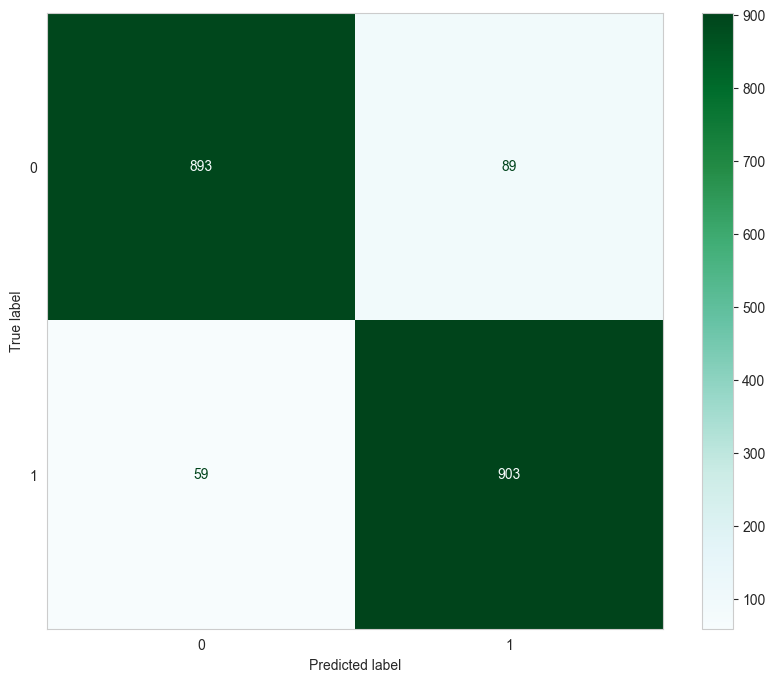

In [216]:
cm = confusion_matrix(y_test_smote, knn.predict(X_test_smote), labels=knn.classes_)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Создаем один subplot
fig, ax = plt.subplots(figsize=(10,8))

# Используем ax для отображения матрицы ошибок
cmp.plot(include_values=True, cmap='BuGn', ax=ax, xticks_rotation='horizontal')
plt.grid(False)
plt.show()

## Decision Tree Clasifier

In [174]:
parameter_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 5],

}

In [175]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(clf, parameter_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

y_pred = best_estimator.predict(X_test_smote)


In [177]:
best_estimator = DecisionTreeClassifier(**best_params)

# Обучите классификатор на обучающих данных
best_estimator.fit(X_train_smote, y_train_smote)

# Сделайте предсказания на тестовых данных
y_pred = best_estimator.predict(X_test_smote)

# Оцените точность предсказаний
accuracy = accuracy_score(y_test_smote, y_pred)
print(f"Accuracy on test: {accuracy}")

Accuracy on test: 0.9151234567901234


In [180]:
y_pred_cv = cross_val_predict(clf, X_train_smote, y_train_smote, cv=splitter)
print("Best Parameters:", best_params)
print(f'Accuracy: {accuracy:.2f}')
# Print the classification report
print(classification_report(y_train_smote, y_pred_cv))

Best Parameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      3878
           1       0.90      0.92      0.91      3898

    accuracy                           0.91      7776
   macro avg       0.91      0.91      0.91      7776
weighted avg       0.91      0.91      0.91      7776


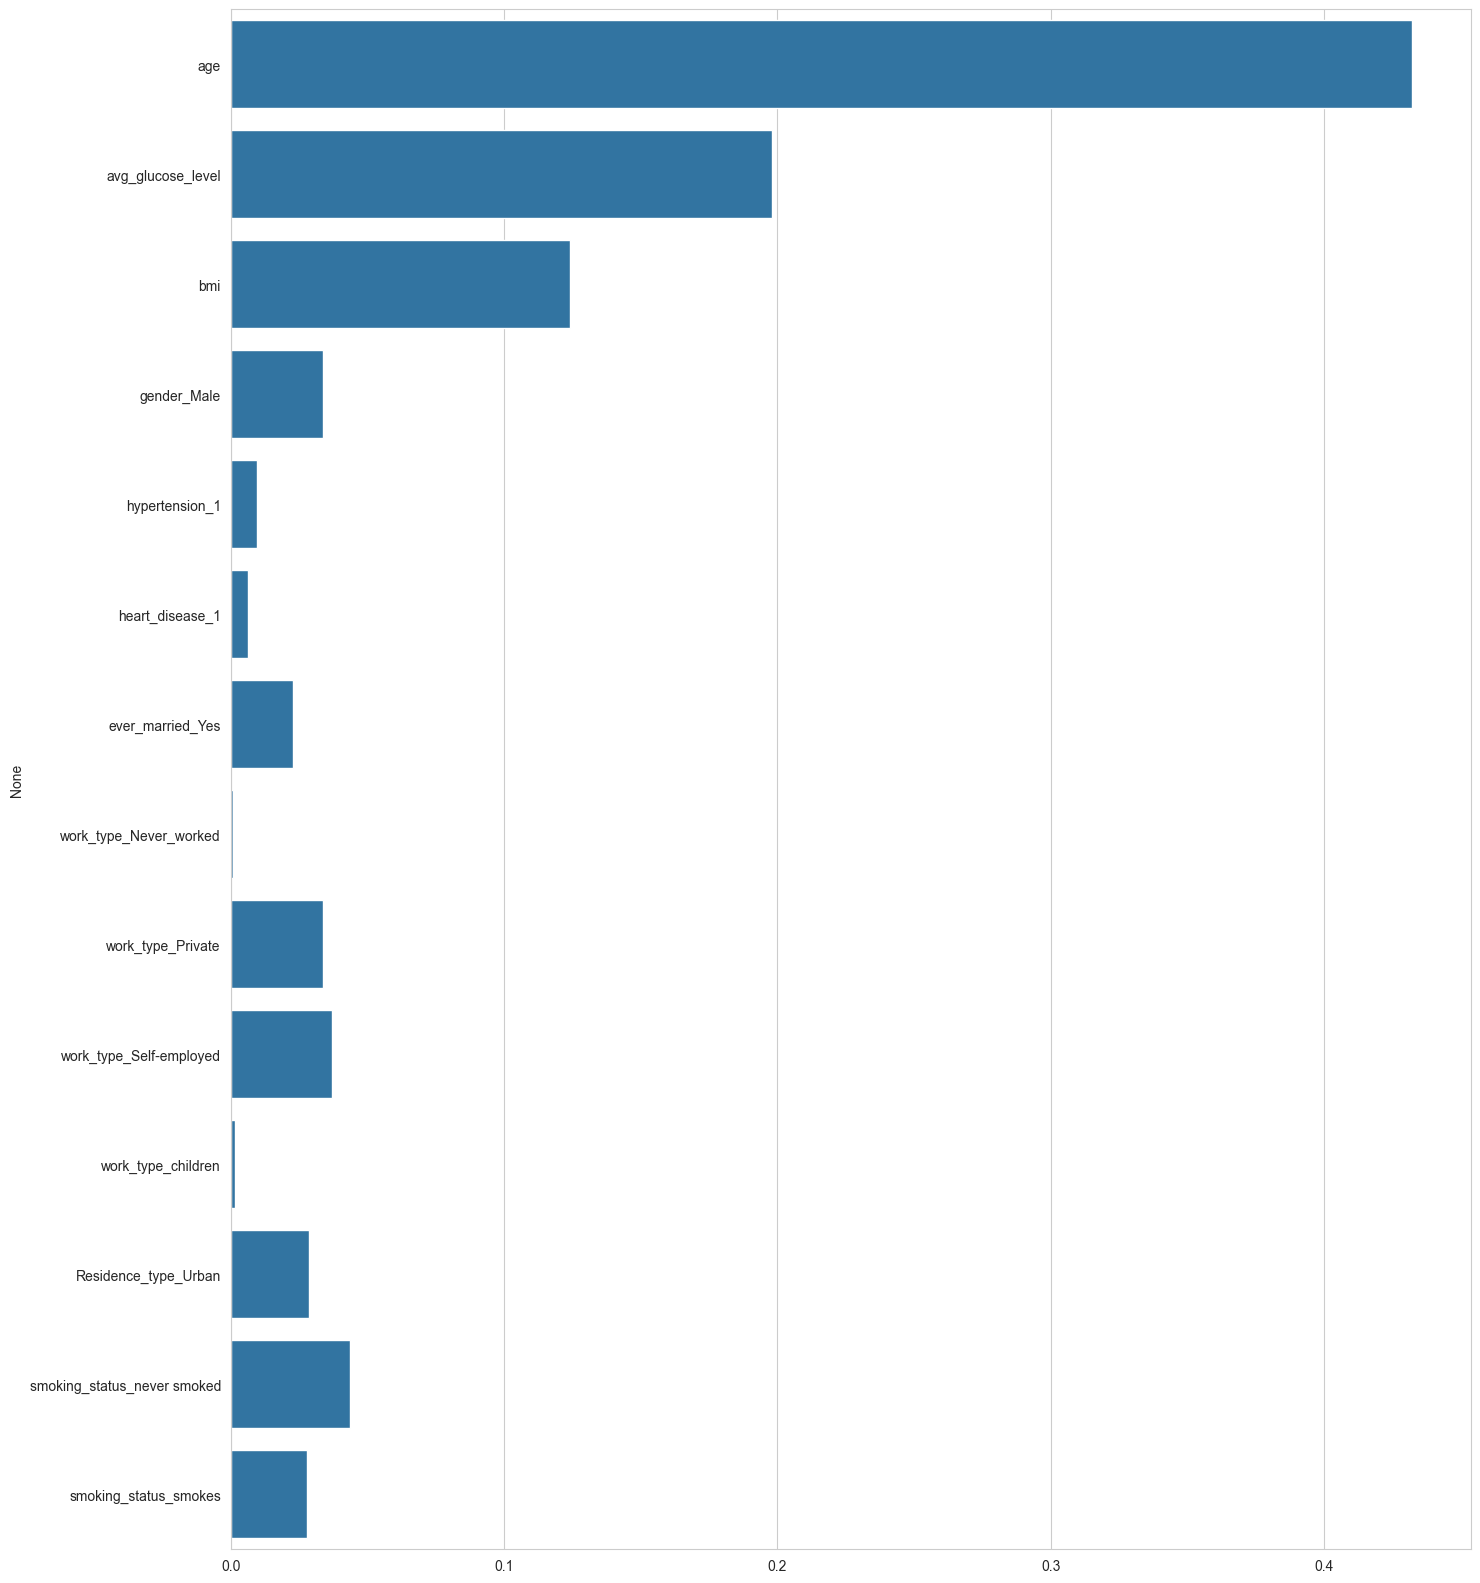

In [181]:
import seaborn as sns

# Получите лучший классификатор из GridSearchCV
best_classifier = grid_search.best_estimator_

# Визуализируйте важность признаков
fig = plt.figure(figsize=(16, 20))
sns.barplot(x=best_classifier.feature_importances_, y=X_test_smote.columns)
plt.show()

In [ ]:
#???
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1, support = precision_recall_fscore_support(y_train_smote, y_pred_cv)

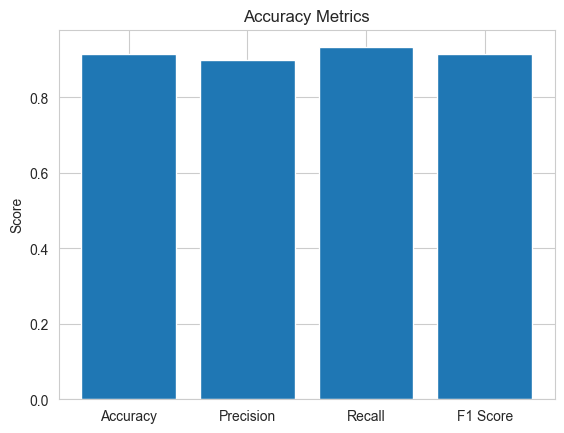

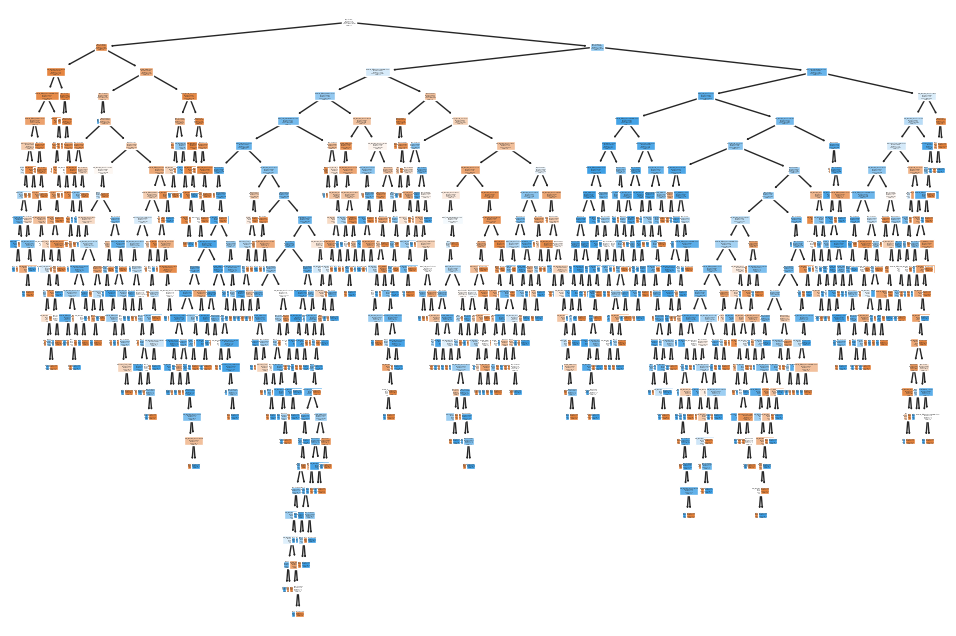

In [182]:
from sklearn import tree
import matplotlib.pyplot as plt
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_scores = [accuracy, precision, recall, f1]
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


plt.bar(metrics_names, metrics_scores)
plt.ylabel('Score')
plt.title('Accuracy Metrics')

# Create a figure for the tree plot
plt.figure(figsize=(12, 8))
plot_tree(best_estimator, filled=True, feature_names=X_train_smote.columns, class_names=np.unique(y_train_smote).astype(str))

plt.show()


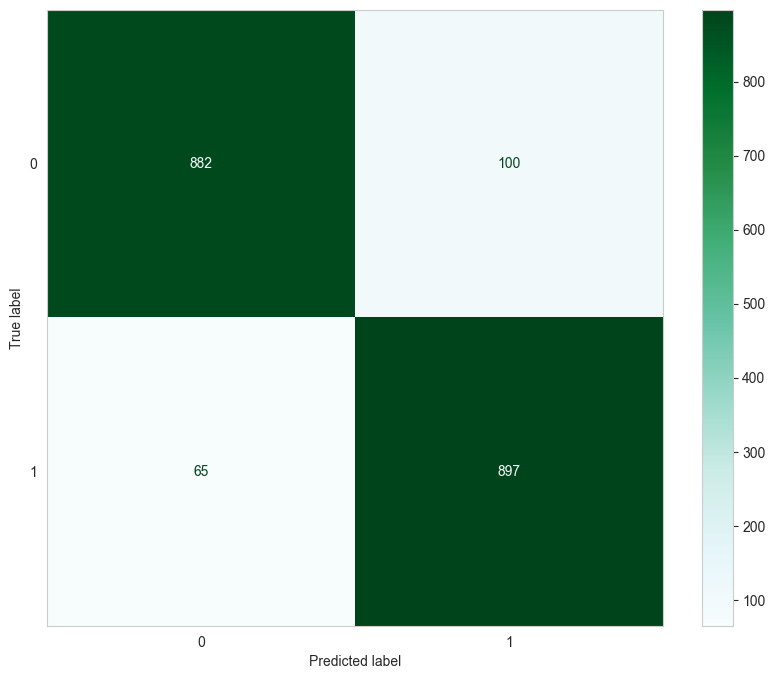

In [183]:
cm = confusion_matrix(y_test_smote, best_estimator.predict(X_test_smote), labels=best_estimator.classes_)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Создаем один subplot
fig, ax = plt.subplots(figsize=(10,8))

# Используем ax для отображения матрицы ошибок
cmp.plot(include_values=True, cmap='BuGn', ax=ax, xticks_rotation='horizontal')
plt.grid(False)
plt.show()

## Random Forest Classifier

In [185]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=10,verbose=False)

In [186]:
# n_estimators = [int(x) for x in np.linspace(start = 50, stop = 400, num = 3)]
# max_depth = [int(x) for x in np.linspace(10, 51, num = 4)]

param_grid = {'n_estimators': [10, 50, 100],  # пример значений для n_estimators
              'max_depth': [None, 10, 20, 30]  # пример значений для max_depth
              }

### Передадим в GridSearchCV

search = GridSearchCV(rf, 
                      param_grid, 
                      cv=splitter,
                      scoring='accuracy',
                      verbose=10)

search.fit(X_train_smote, y_train_smote)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

print(f"Качество лучшей модели на финальном тесте: {search.score(X_test_smote, y_test_smote)}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START max_depth=None, n_estimators=10............................
[CV 1/5; 1/12] END max_depth=None, n_estimators=10;, score=0.923 total time=   0.0s
[CV 2/5; 1/12] START max_depth=None, n_estimators=10............................
[CV 2/5; 1/12] END max_depth=None, n_estimators=10;, score=0.940 total time=   0.0s
[CV 3/5; 1/12] START max_depth=None, n_estimators=10............................
[CV 3/5; 1/12] END max_depth=None, n_estimators=10;, score=0.929 total time=   0.0s
[CV 4/5; 1/12] START max_depth=None, n_estimators=10............................
[CV 4/5; 1/12] END max_depth=None, n_estimators=10;, score=0.934 total time=   0.0s
[CV 5/5; 1/12] START max_depth=None, n_estimators=10............................
[CV 5/5; 1/12] END max_depth=None, n_estimators=10;, score=0.934 total time=   0.0s
[CV 1/5; 2/12] START max_depth=None, n_estimators=50............................
[CV 1/5; 2/12] END max_depth=None

In [187]:
forest = RandomForestClassifier(criterion='entropy',max_depth= None, min_samples_leaf= 1, min_samples_split= 5,n_estimators=100)
forest.fit(X_train_smote, y_train_smote)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [188]:
Y_pred = forest.predict(X_test_smote)
accuracy = accuracy_score(y_test_smote, Y_pred)
classification_rep = classification_report(y_test_smote, Y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9526748971193416
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       982
           1       0.95      0.96      0.95       962

    accuracy                           0.95      1944
   macro avg       0.95      0.95      0.95      1944
weighted avg       0.95      0.95      0.95      1944


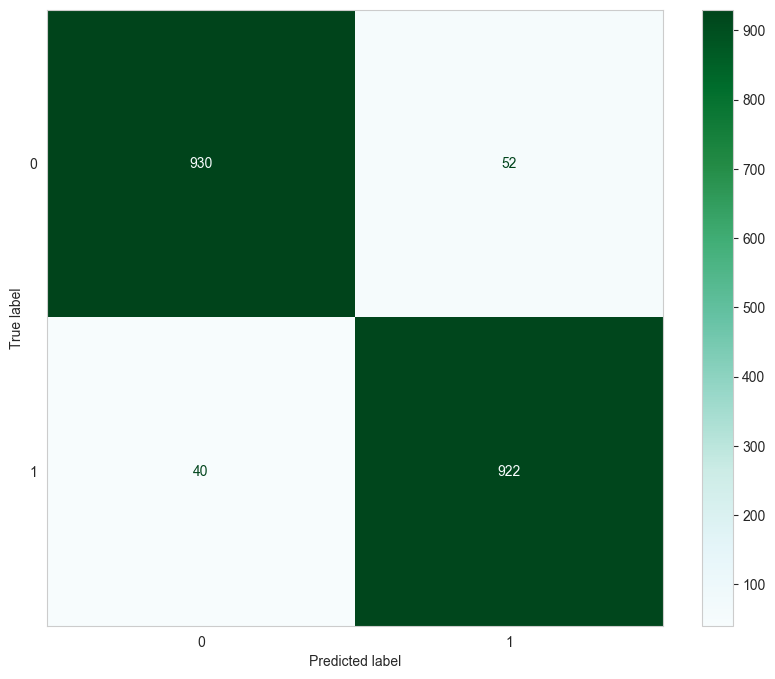

In [189]:
cm = confusion_matrix(y_test_smote, forest.predict(X_test_smote), labels=forest.classes_)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Создаем один subplot
fig, ax = plt.subplots(figsize=(10,8))

# Используем ax для отображения матрицы ошибок
cmp.plot(include_values=True, cmap='BuGn', ax=ax, xticks_rotation='horizontal')
plt.grid(False)
plt.show()

Feature Importance
Finally, we will use feature importance to find the factors that impacts the risk of stroke the most

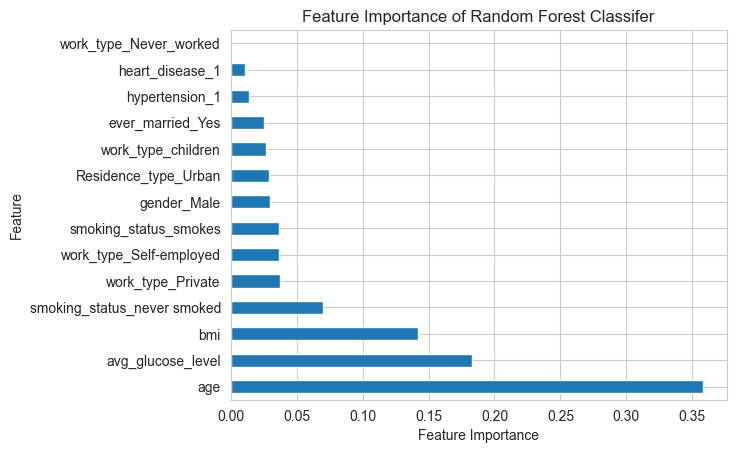

In [190]:
# Feature Importance on the final parameter-optimized model
feature_importance = pd.Series(forest.feature_importances_, index=X_smote.columns)
feature_importance.sort_values(ascending=False, inplace=True)
feature_importance.plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of Random Forest Classifer')
plt.show()

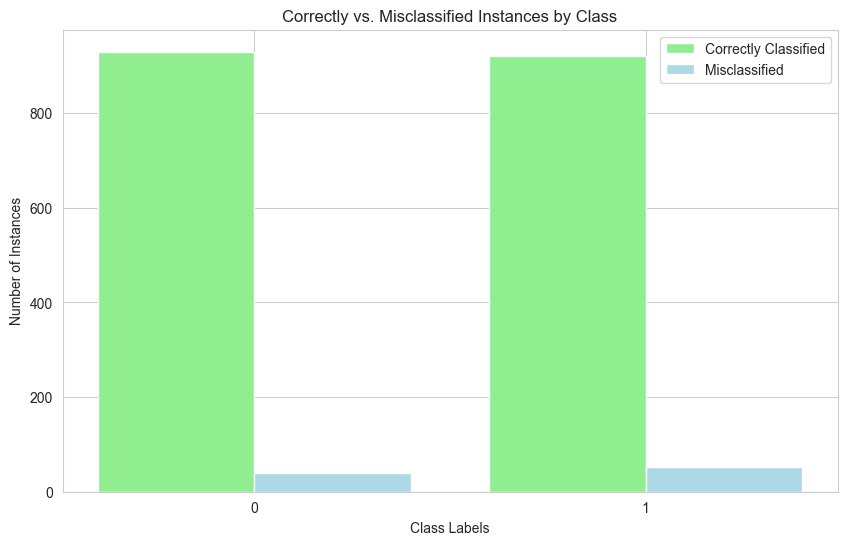

In [191]:
class_labels = np.unique(y_test_smote)
class_labels_numeric = np.arange(len(class_labels))  # Convert labels to numeric values

# Calculate the number of correctly and incorrectly classified instances for each class
correctly_classified = np.diag(cm)
misclassified = np.sum(cm, axis=0) - correctly_classified

# Create a bar chart with lightgreen and lightblue colors
plt.figure(figsize=(10, 6))
plt.bar(class_labels_numeric - 0.2, correctly_classified, width=0.4, label='Correctly Classified', color='lightgreen')
plt.bar(class_labels_numeric + 0.2, misclassified, width=0.4, label='Misclassified', color='lightblue')

# Add labels and legend
plt.xlabel('Class Labels')
plt.ylabel('Number of Instances')
plt.xticks(class_labels_numeric, class_labels)  # Set tick labels back to original class labels
plt.title('Correctly vs. Misclassified Instances by Class')
plt.legend()

# Display the chart
plt.show()

balance f

In [587]:
np.random.seed(666)
df['random_prediction'] = np.random.choice([0, 1], size=len(df))

accuracy_random = (df['stroke'] == df['random_prediction']).mean()
print(f"Accuracy (Random Predictor): {accuracy_random}")

Accuracy (Random Predictor): 0.49902152641878667


In [194]:
X_test_smote

age  avg_glucose_level        bmi  gender_Male  hypertension_1  \
2506  34.000000          59.910000  28.400000            1               0   
671   61.000000          88.270000  30.190000            1               0   
2092  27.000000          88.970000  28.800000            0               0   
6628  63.567949         139.923926  30.904871            1               0   
8209  32.484642          76.482820  29.681911            0               0   
...         ...                ...        ...          ...             ...   
1813  78.000000          58.660000  16.400000            0               1   
900   71.000000          70.710000  30.100000            1               0   
6454  43.881876          84.411576  26.027292            0               0   
8519  71.211969          72.519491  34.366834            0               0   
9098  53.107640          71.657256  28.901562            0               0   

      heart_disease_1  ever_married_Yes  work_type_Never_worked  \
2506                0                 1                       0   
671                 1                 1                       0   
2092                0                 1                       0   
6628                0                 1                       0   
8209                0                 1                       0   
...               ...               ...                     ...   
1813                0                 1                       0   
900                 1                 1                       0   
6454                0                 1                       0   
8519                0                 0                       0   
9098                0                 1                       0   

      work_type_Private  work_type_Self-employed  work_type_children  \
2506                  1                        0                   0   
671                   1                        0                   0   
2092                  0                        1                   0   
6628                  1                        0                   0   
8209                  1                        0                   0   
...                 ...                      ...                 ...   
1813                  1                        0                   0   
900                   1                        0                   0   
6454                  1                        0                   0   
8519                  0                        0                   0   
9098                  1                        0                   0   

      Residence_type_Urban  smoking_status_never smoked  smoking_status_smokes  
2506                     1                            0                      0  
671                      1                            1                      0  
2092                     1                            1                      0  
6628                     0                            0                      0  
8209                     0                            0                      0  
...                    ...                          ...                    ...  
1813                     0                            1                      0  
900                      1                            1                      0  
6454                     0                            1                      0  
8519                     1                            0                      0  
9098                     0                            0                      0  

[1944 rows x 14 columns]

In [192]:
import joblib
# Save the model to a file
filename = 'stroke_predict.pkl'
joblib.dump(forest, filename)

['stroke_predict.pkl']

In [3]:
import joblib
filename = 'stroke_predict.pkl'
loaded_model = joblib.load(filename)

In [9]:
input_data = np.array([89, 120, 50, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0]).reshape(1, -1)
loaded_model.predict_proba(input_data)

array([[0.44395455, 0.55604545]])

In [202]:
loaded_model.predict(X_test_smote)

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)